In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#We will use a command to see all the columns of the dataset
pd.pandas.set_option("display.max_columns",None)

In [3]:
#Reading the data set
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
#We will have a look at the first few row of the training dataset
train_df.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#We will have a look at the first few row of the test dataset
test_df.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
0,1461,20,RHD,80.0,16104.819760,Paved,NaN,Reg,Lvl,AllPub,I,GS,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,CB,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,TF,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RLD,81.0,15639.150810,Paved,NaN,IR1,Lvl,AllPub,C,GS,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,SS,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CB,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,TF,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RLD,74.0,3849.428920,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,PC,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,TF,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RLD,78.0,4955.447942,Paved,NaN,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,SS,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PC,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,TF,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RLD,43.0,3046.604942,Paved,NaN,IR1,HLS,AllPub,I,GS,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,SS,HdBoard,HdBoard,None,0.0,Gd,TA,PC,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,TF,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#WE will now concatinate these two datasets into one
df = pd.concat([train_df,test_df],axis=0,ignore_index=True)

In [7]:
#We will now see the dataset head and tail
df.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450.0,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2.0,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RLD,80.0,9600.0,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2.0,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RLD,68.0,11250.0,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2.0,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RLD,60.0,9550.0,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3.0,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RLD,84.0,14260.0,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3.0,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
df.tail()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
2913,2915,160,RMD,21.0,14584.838440,Paved,NaN,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD,NoRMD,Twnhs,2Story,4,7,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,TF,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0.0,0.0,0.0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,NoRMDal,NaN
2914,2916,160,RMD,21.0,8072.991379,Paved,NaN,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD,NoRMD,TwnhsE,2Story,4,5,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,TF,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0.0,24.0,0.0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,AbnoRMDl,NaN
2915,2917,20,RLD,160.0,7367.775348,Paved,NaN,Reg,Lvl,AllPub,I,GS,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,CB,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,TF,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474.0,0.0,0.0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2916,2918,85,RLD,62.0,2203.135444,Paved,NaN,Reg,Lvl,AllPub,I,GS,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,SS,HdBoard,Wd Shng,None,0.0,TA,TA,PC,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,TF,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80.0,32.0,0.0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2917,2919,60,RLD,74.0,6253.431852,Paved,NaN,Reg,Lvl,AllPub,I,MS,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,SS,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PC,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,TF,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190.0,48.0,0.0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [9]:
#We will check the information of the dataset- that will give us the information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         2918 non-null   int64  
 1   Building_Class             2918 non-null   int64  
 2   Zoning_Class               2914 non-null   object 
 3   Lot_Extent                 2432 non-null   float64
 4   Lot_Size                   2918 non-null   float64
 5   Road_Type                  2918 non-null   object 
 6   Lane_Type                  198 non-null    object 
 7   Property_Shape             2918 non-null   object 
 8   Land_Outline               2918 non-null   object 
 9   Utility_Type               2916 non-null   object 
 10  Lot_Configuration          2918 non-null   object 
 11  Property_Slope             2918 non-null   object 
 12  Neighborhood               2918 non-null   object 
 13  Condition1                 2918 non-null   objec

There are certain relationship among the variables

1. First_Floor_Area + Second_Floor_Area + LowQualFinSF = Grade_Living_Area
2. BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = Total_Basement_Area

So we will check the relationship of these individual variable with the dependent variable

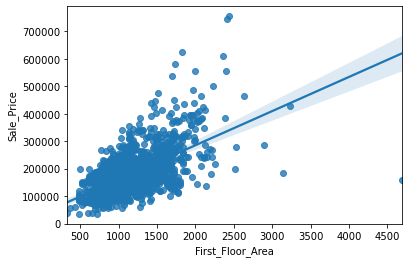

In [10]:
sns.regplot(train_df['First_Floor_Area'], train_df['Sale_Price'])

First_Floor_Area and Sale_Price shows a positive relation

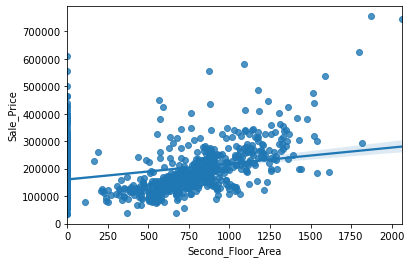

In [11]:
sns.regplot(train_df['Second_Floor_Area'], train_df['Sale_Price'])

There are lot of values having 0 second floor area but still it shows a positive relation with dependent variable

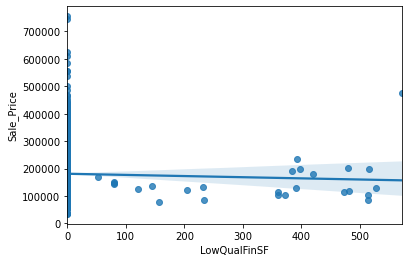

In [12]:
sns.regplot(train_df['LowQualFinSF'], train_df['Sale_Price'])

Majority of the data is having zero values in it so we can ignore this (if needed)

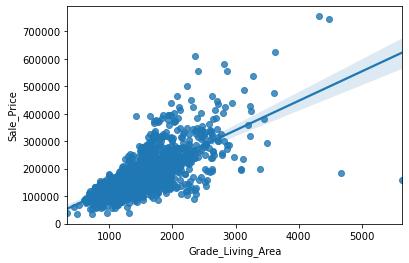

In [13]:
sns.regplot(train_df['Grade_Living_Area'], train_df['Sale_Price'])

THis shows a positive relation so we can use this in place of all three values

We will now check the values of other condition

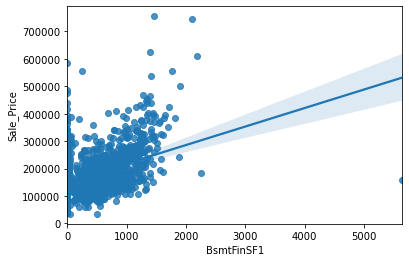

In [14]:
sns.regplot(train_df['BsmtFinSF1'], train_df['Sale_Price'])

There are lot of valueshaving 0 value but it still shows a positive relations 

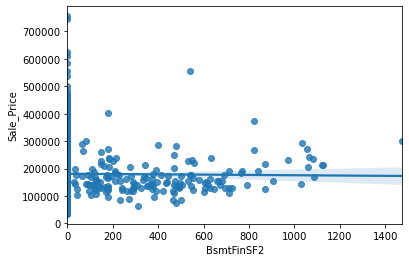

In [15]:
sns.regplot(train_df['BsmtFinSF2'], train_df['Sale_Price'])

There is no relation of BsmtFinSF2 and Sale Price so we can ignore this if needed

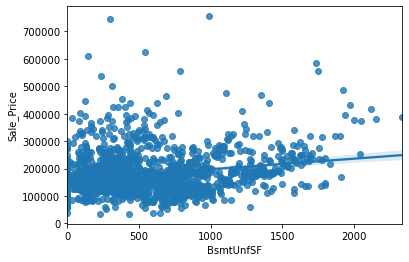

In [16]:
sns.regplot(train_df['BsmtUnfSF'], train_df['Sale_Price'])

This is having relationship with the Sale_Price variable.

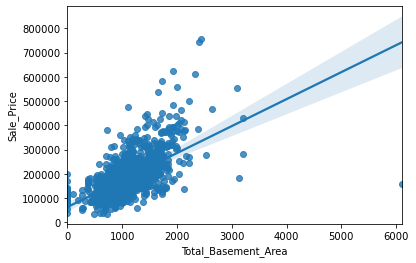

In [17]:
sns.regplot(train_df['Total_Basement_Area'], train_df['Sale_Price'])

This is having a linear relation with the Sale_Price

So we can remove those three variables and keep this total basement area

### We will now deal with the numerical data.

In [18]:
#We will make a different dataframe of numerical data 
num_df = df.select_dtypes(exclude="O")
num_df.head()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
0,1,60,65.0,8450.0,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,1085.793744,163.788080,69.596115,20.337934,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600.0,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,196.316304,198.900074,74.716033,15.039392,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250.0,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,218.068403,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550.0,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,696.996439,46.948018,40.181415,60.921821,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260.0,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,568.859882,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,250000.0


In [19]:
#We will now check the null values from this temporary dataframe
num_df.isnull().sum()

Id                              0
Building_Class                  0
Lot_Extent                    486
Lot_Size                        0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Brick_Veneer_Area              23
BsmtFinSF1                      1
BsmtFinSF2                      1
BsmtUnfSF                       1
Total_Basement_Area             1
First_Floor_Area                0
Second_Floor_Area               0
LowQualFinSF                    0
Grade_Living_Area               0
Underground_Full_Bathroom       2
Underground_Half_Bathroom       2
Full_Bathroom_Above_Grade       0
Half_Bathroom_Above_Grade       0
Bedroom_Above_Grade             0
Kitchen_Above_Grade             0
Rooms_Above_Grade               0
Fireplaces                      0
Garage_Built_Year             159
Garage_Size                     1
Garage_Area                     1
W_Deck_Area                     0
Open_Lobby_Are

In [20]:
#We will drop the dependent variable from this temporary dataframe
num_df.drop('Sale_Price',axis=1, inplace=True)

C:\Users\mishr\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


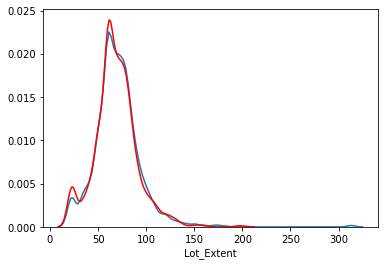

In [21]:
#We will now plot the distribution of Lot_Extent variable 
sns.distplot(train_df['Lot_Extent'], hist=False)
sns.distplot(test_df['Lot_Extent'],color='red', hist=False)
plt.show()

The train data set and test dataset are having majority of values around 60-70 and having outliers also.

So we can replace the NaN with the median of the train dataset.

69.0


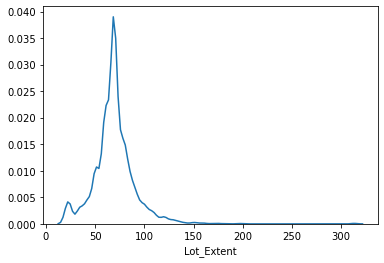

In [22]:
#we will fill the NaN of Lot_Extent with the median of the variable
print(train_df['Lot_Extent'].median())
df.Lot_Extent.fillna(train_df['Lot_Extent'].median(), inplace=True)
sns.distplot(df['Lot_Extent'], hist=False)

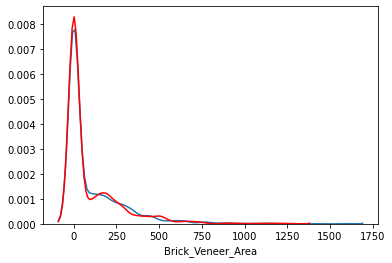

In [23]:
#We will check the brick venner area
sns.distplot(train_df['Brick_Veneer_Area'], hist=False)
sns.distplot(test_df['Brick_Veneer_Area'],color='red', hist=False)
plt.show()

In [24]:
print("The describe for the train dataset is-----")
print(train_df['Brick_Veneer_Area'].describe())
print("The describe for the test dataset is-----")
print(test_df['Brick_Veneer_Area'].describe())

The describe for the train dataset is-----
count    1451.00000
mean      103.75672
std       181.10815
min         0.00000
25%         0.00000
50%         0.00000
75%       166.00000
max      1600.00000
Name: Brick_Veneer_Area, dtype: float64
The describe for the test dataset is-----
count    1444.000000
mean      100.709141
std       177.625900
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1290.000000
Name: Brick_Veneer_Area, dtype: float64


Brick_Veneer_Area is having a some realtion with Brick_Veneer_Type. As there are some houses where there is no brick venner. So directly we can not remove the null with median as itwill distort the relaiton of these two


But if we look carefully these two variables have the null values at same location except one location Brick_Veneer_Type is having one extra NaN and at that position we have 198 value of Brick_Veneer_Area. So we can remove that one particular column and replace the rest of Brick_Veneer_Type with None and Brick_Veneer_Area with 0.
 


In [25]:
df.loc[df['Brick_Veneer_Area'].isnull(),'Brick_Veneer_Type']

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1243    NaN
1278    NaN
1690    NaN
1705    NaN
1881    NaN
1991    NaN
2003    NaN
2040    NaN
2310    NaN
2324    NaN
2339    NaN
2348    NaN
2367    NaN
2591    NaN
2656    NaN
2685    NaN
2861    NaN
Name: Brick_Veneer_Type, dtype: object

In [26]:
df.loc[df['Brick_Veneer_Type'].isnull(),'Brick_Veneer_Area']

234       NaN
529       NaN
650       NaN
936       NaN
973       NaN
977       NaN
1243      NaN
1278      NaN
1690      NaN
1705      NaN
1881      NaN
1991      NaN
2003      NaN
2040      NaN
2310      NaN
2324      NaN
2339      NaN
2348      NaN
2367      NaN
2591      NaN
2609    198.0
2656      NaN
2685      NaN
2861      NaN
Name: Brick_Veneer_Area, dtype: float64

In [27]:
#We Will replace the NAN of Brick_Veneer_Area with 0
df['Brick_Veneer_Area'].fillna(0, inplace=True)

#We have to replace the NaN of Brick_Veneer_Type with None and remove row 2609

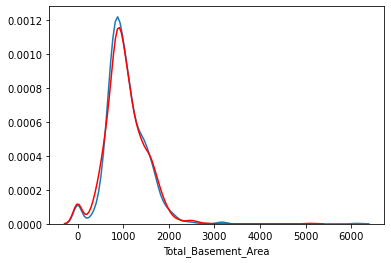

In [28]:
#We will now see Total_Basement_Area
sns.distplot(train_df['Total_Basement_Area'], hist=False)
sns.distplot(test_df['Total_Basement_Area'],hist=False, color='red')

The distribution of the data is almost same in train as well as test is same.

In [29]:
#We will replace the NaN of the df with the Median 
df['Total_Basement_Area'].fillna(train_df['Total_Basement_Area'].median(), inplace=True)

## We will not remove any of the variable for now because after removing NaN we will do Chi square test 

In [30]:
#WE will replace the rest three variables for basement area with the median value of train dataset
df['BsmtFinSF1'].fillna(train_df['BsmtFinSF1'].median(), inplace=True)
df['BsmtFinSF2'].fillna(train_df['BsmtFinSF2'].median(), inplace=True)
df['BsmtUnfSF'].fillna(train_df['BsmtUnfSF'].median(), inplace=True)

0    856
1    587
2     15
3      1
Name: Underground_Full_Bathroom, dtype: int64
0.0    849
1.0    584
2.0     23
3.0      1
Name: Underground_Full_Bathroom, dtype: int64


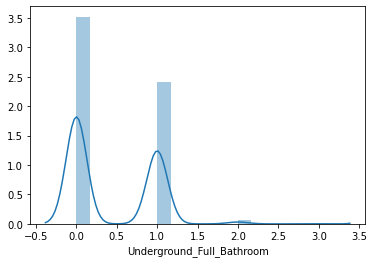

In [31]:
#The next variable we are gonna deal with is Underground_Full_Bathroom
sns.distplot(train_df['Underground_Full_Bathroom'])
print(train_df.Underground_Full_Bathroom.value_counts())
print(test_df.Underground_Full_Bathroom.value_counts())

Since Underground_Full_Bathroom and Underground_Half_Bathroom relates with BsmtFinSF1, BsmtFinSF2,BsmtUnfSF 

In [32]:
df['Underground_Full_Bathroom'].fillna(0,inplace=True)
df['Underground_Half_Bathroom'].fillna(0,inplace=True)

81
78


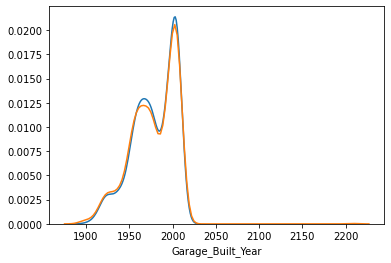

In [33]:
##We will now See Garage Built year
sns.distplot(train_df['Garage_Built_Year'],hist=False)
sns.distplot(test_df['Garage_Built_Year'],hist=False)
print(train_df.Garage_Built_Year.isnull().sum())
print(test_df.Garage_Built_Year.isnull().sum())

There is one value in Garage_Built_Year which is having a built year of 2207 so we have replaced it with 2007.0.

In [34]:
df.loc[df['Garage_Built_Year']==2207.0,'Garage_Built_Year']=2007.0

In [35]:
print(train_df.Garage_Built_Year.median())
print(test_df.Garage_Built_Year.median())

1980.0
1979.0


Since the median of both the dataset is approx same we can replace by median of the train dataset

In [36]:
df['Garage_Built_Year'].fillna(1980.0, inplace=True) #Replacing the NaN with median of train dataset

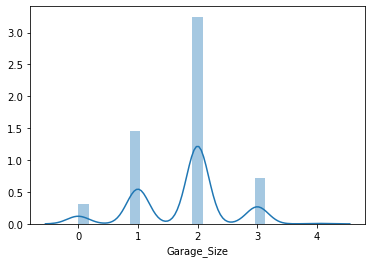

In [37]:
#We will now see Garage_Size
sns.distplot(train_df['Garage_Size'])

In [38]:
df.Garage_Size.fillna(2,inplace=True)

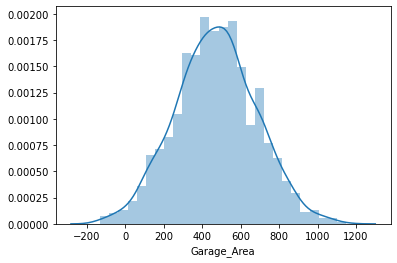

In [39]:
#Now we will see Garage_Area
sns.distplot(train_df['Garage_Area'])

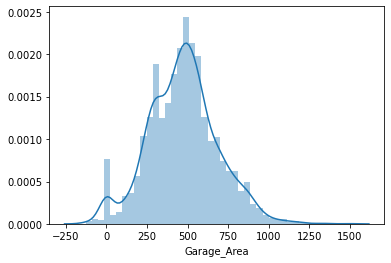

In [40]:
sns.distplot(df['Garage_Area'])

There are some of the values of the area of the gragae which are in negative and that is not possible so we will repalce those values with the mean 

In [41]:
df.loc[df['Garage_Area']<0]

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
69,70,50,RLD,81.0,15593.0,Paved,NaN,Reg,Lvl,AllPub,C,GS,ClearCr,Norm,Norm,1Fam,1.5Fin,7,4,1953,1953,Gable,SS,BrkFace,AsbShng,None,0.0,Gd,TA,CB,TA,TA,No,BLQ,603.0,Unf,0.0,701.0,1304.0,GasW,TA,Y,SBrkr,1304,983,0,2287,0.0,0.0,2,0,3,1,TA,7,TF,1,TA,Attchd,1953.0,Fin,2.0,-16.860347,TA,TA,Y,-162.739889,113.757800,114.806948,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,225000.0
193,194,160,RMD,24.0,2522.0,Paved,NaN,Reg,Lvl,AllPub,I,GS,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,SS,VinylSd,VinylSd,Stone,50.0,Gd,TA,PC,Gd,TA,No,Unf,0.0,Unf,0.0,970.0,970.0,GasA,Ex,Y,SBrkr,970,739,0,1709,0.0,0.0,2,0,3,1,Gd,7,MajD1,0,NaN,Detchd,2004.0,Unf,2.0,-81.843899,TA,TA,Y,69.964179,-9.676807,-38.013168,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,130000.0
243,244,160,RLD,75.0,10762.0,Paved,NaN,Reg,Lvl,AllPub,C,GS,SawyerW,Norm,Norm,TwnhsE,2Story,6,6,1980,1980,Gable,SS,Plywood,Plywood,None,0.0,TA,TA,CB,Gd,TA,No,Unf,0.0,Unf,0.0,626.0,626.0,GasA,TA,Y,SBrkr,626,591,0,1217,0.0,0.0,1,1,3,1,TA,6,TF,1,TA,Attchd,1980.0,RFn,1.0,-112.363461,TA,TA,Y,39.368977,13.930571,87.701750,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,120000.0
294,295,20,RLD,80.0,9600.0,Paved,NaN,Reg,Lvl,AllPub,I,GS,NAmes,Norm,Norm,1Fam,1Story,6,5,1953,1953,Hip,SS,HdBoard,HdBoard,Stone,238.0,TA,TA,CB,TA,TA,No,GLQ,1285.0,Unf,0.0,131.0,1416.0,GasA,TA,Y,SBrkr,1644,0,0,1644,1.0,0.0,1,0,3,1,TA,7,TF,2,Gd,Attchd,1953.0,Fin,2.0,-3.869822,TA,TA,Y,207.448449,70.688248,96.935507,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,167000.0
363,364,160,RMD,21.0,1680.0,Paved,NaN,Reg,Lvl,AllPub,I,GS,BrDale,Norm,Norm,Twnhs,2Story,6,8,1972,2007,Gable,SS,HdBoard,HdBoard,BrkFace,510.0,TA,TA,CB,TA,TA,No,ALQ,162.0,Unf,0.0,321.0,483.0,GasA,Gd,Y,SBrkr,483,504,0,987,0.0,0.0,1,1,2,1,Gd,5,TF,0,NaN,Detchd,1972.0,Unf,1.0,-16.290904,TA,TA,Y,332.684275,-19.032405,63.043456,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,118000.0
442,443,50,RMD,52.0,6240.0,Paved,NaN,Reg,Lvl,AllPub,I,GS,BrkSide,Norm,Norm,1Fam,1.5Fin,5,7,1930,1992,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,PC,TA,TA,No,Unf,0.0,Unf,0.0,1078.0,1078.0,GasA,TA,Y,SBrkr,1128,445,0,1573,0.0,0.0,2,0,3,1,TA,8,TF,1,Gd,Detchd,1930.0,Unf,2.0,-1.415920,TA,TA,P,360.164514,-47.124532,-22.830832,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,162900.0
488,489,190,RLD,60.0,10800.0,Paved,NaN,Reg,Lvl,AllPub,C,GS,OldTown,Norm,Norm,2fmCon,1.5Fin,5,4,1900,1970,Gable,SS,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CB,TA,Fa,No,BLQ,664.0,Unf,0.0,290.0,954.0,GasA,TA,N,FuseA,1766,648,0,2414,0.0,0.0,2,0,3,2,TA,10,MD,1,Gd,Attchd,1970.0,Unf,2.0,-59.878412,TA,Fa,N,83.282902,35.459108,149.311241,0,0,0,NaN,NaN,NaN,0,5,2006,ConLD,Normal,160000.0
671,672,70,RHD,54.0,6629.0,Paved,NaN,Reg,Lvl,AllPub,I,GS,Edwards,Artery,Norm,1Fam,2Story,6,6,1925,1950,Gambrel,SS,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BT,TA,TA,No,BLQ,551.0,Unf,0.0,121.0,672.0,GasA,TA,N,SBrkr,697,672,0,136

In [42]:
#We will replace the values with negative area to the mean of train dataset
df.loc[df['Garage_Area']<0,'Garage_Area']=train_df['Garage_Area'].mean()

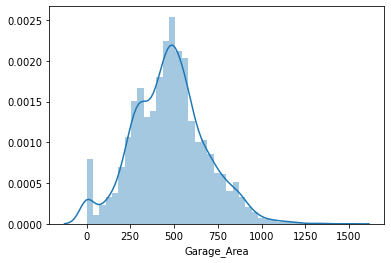

In [43]:
#We will check the distribution again
sns.distplot(df['Garage_Area'])

In [44]:
#We will now check the location of the NAN 
df.loc[df['Garage_Area'].isnull()]

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
2575,2577,70,RMD,50.0,4083.127272,Paved,NaN,Reg,Lvl,AllPub,I,GS,IDOTRR,NoRMD,NoRMD,1Fam,2Story,5,6,1923,1999,Gable,SS,Wd Sdng,Plywood,None,0.0,TA,TA,BT,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,TF,0,NaN,Detchd,1980.0,NaN,2.0,NaN,NaN,NaN,Y,174.0,0.0,212.0,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN


In [45]:
#We will replace the NaN with the mean
df['Garage_Area'].fillna(train_df['Garage_Area'].mean(), inplace=True)

We have filled the NaN of the numerical values 

In [46]:
#There aremore variable W_deck_area,Open_Lobby_Area,Enclosed_Lobby_Area which is in negative so we will handle that too
df.loc[df['W_Deck_Area']<0,'W_Deck_Area']=train_df['W_Deck_Area'].mean()
df.loc[df['Open_Lobby_Area']<0,'Open_Lobby_Area']=train_df['Open_Lobby_Area'].mean()
df.loc[df['Enclosed_Lobby_Area']<0,'Enclosed_Lobby_Area']=train_df['Enclosed_Lobby_Area'].mean()

we willnow create a new data frame to check the correlation among the data

In [47]:
not_null = df.select_dtypes(exclude="O")
not_null = not_null.loc[0:1458]

In [48]:
not_null.corr()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
Id,1.000000,0.012207,-0.010209,-0.033191,-0.027456,0.012169,-0.012479,-0.020884,-0.050452,-0.006037,-0.007773,-0.006791,-0.015969,0.010220,0.006541,-0.044133,0.008869,0.000976,-0.019890,0.006814,0.005336,0.037563,0.003205,0.027646,-0.018668,0.000550,0.017813,-0.038822,0.007986,0.050283,0.002000,-0.046545,0.001653,0.057184,-0.006145,0.021336,0.000548,-0.021441
Building_Class,0.012207,1.000000,-0.356678,-0.139852,0.032168,-0.059106,0.027734,0.040029,0.023240,-0.069364,-0.064813,-0.141426,-0.238327,-0.251685,0.307557,0.046414,0.074583,0.004156,-0.002477,0.131076,0.178227,-0.023346,0.281672,0.040201,-0.046165,0.081087,-0.040749,-0.007654,-0.002412,-0.033854,0.041079,-0.043906,-0.026199,0.008244,-0.007738,-0.013660,-0.021330,-0.084563
Lot_Extent,-0.010209,-0.356678,1.000000,0.304537,0.234995,-0.053345,0.116722,0.083530,0.178583,0.214288,0.042256,0.124297,0.363432,0.413750,0.072532,0.037489,0.368124,0.090205,-0.006941,0.180766,0.047051,0.236820,-0.004871,0.320586,0.233449,0.063095,0.269806,-0.027700,0.020572,0.053418,-0.008466,0.061965,0.037700,0.180833,-0.000241,0.010470,0.006358,0.334865
Lot_Size,-0.033191,-0.139852,0.304537,1.000000,0.105797,-0.005621,0.014220,0.013754,0.103309,0.214190,0.111317,-0.002658,0.260870,0.299491,0.050965,0.004774,0.263119,0.158265,0.048037,0.126035,0.014316,0.119698,-0.017793,0.190009,0.271411,-0.025890,0.154886,0.001232,0.009849,0.023877,0.003630,0.020418,0.043151,0.077670,0.038064,0.001200,-0.014256,0.263843
Overall_Material,-0.027456,0.032168,0.234995,0.105797,1.000000,-0.091749,0.572342,0.550453,0.407075,0.240239,-0.058354,0.307794,0.538210,0.476468,0.295187,-0.030502,0.592916,0.111773,-0.040291,0.550358,0.274328,0.101789,-0.184040,0.427386,0.396455,0.514090,0.600458,0.020527,0.011597,-0.031321,0.040756,0.030314,0.064755,0.065143,-0.031461,0.070766,-0.027277,0.790972
House_Condition,0.012169,-0.059106,-0.053345,-0.005621,-0.091749,1.000000,-0.375953,0.074021,-0.125565,-0.046466,0.039867,-0.136637,-0.171237,-0.144276,0.029158,0.025527,-0.079567,-0.055257,0.117892,-0.193961,-0.061125,0.012938,-0.086951,-0.057505,-0.023580,-0.306177,-0.185565,-0.005191,0.031819,0.007842,-0.031688,0.025535,0.054885,-0.001967,0.068803,-0.003480,0.043916,-0.077754
Construction_Year,-0.012479,0.027734,0.116722,0.014220,0.572342,-0.375953,1.000000,0.592915,0.311558,0.249689,-0.048931,0.148952,0.391550,0.282030,0.010197,-0.183805,0.198959,0.187838,-0.038197,0.468301,0.242960,-0.070630,-0.174836,0.095549,0.147629,0.777198,0.537906,0.012165,-0.011806,-0.055547,0.008559,0.031339,-0.050405,0.004940,-0.034396,0.012382,-0.013598,0.522877
Remodel_Year,-0.020884,0.040029,0.083530,0.013754,0.550453,0.074021,0.592915,1.000000,0.176228,0.129082,-0.066836,0.180605,0.291477,0.240620,0.139574,-0.062519,0.287178,0.120290,-0.012500,0.438667,0.184294,-0.040486,-0.149787,0.191597,0.112024,0.616334,0.420230,0.003489,0.006335,-0.075254,0.023617,0.045224,-0.038932,0.005786,-0.010347,0.021418,0.035846,0.507015
Brick_Veneer_Area,-0.050452,0.023240,0.178583,0.103309,0.407075,-0.125565,0.311558,0.176228,1.000000,0.261681,-0.070802,0.113530,0.360310,0.339990,0.173546,-0.068683,0.387935,0.083488,0.027312,0.272726,0.199713,0.102851,-0.038538,0.279484,0.246747,0.244277,0.361714,0.018097,0.006228,0.000095,0.022270,0.019100,0.062151,0.011903,-0.029550,-0.006771,-0.008263,0.472531
BsmtFinSF1,-0.006037,-0.069364,0.214288,0.214190,0.240239,-0.046466,0.249689,0.12

There are some of the variables which are having less correlation with the dependent variable
1. Garage_Area
2. Open_Lobby_Area
3. Miscellaneous_Value
4. Month_Sold

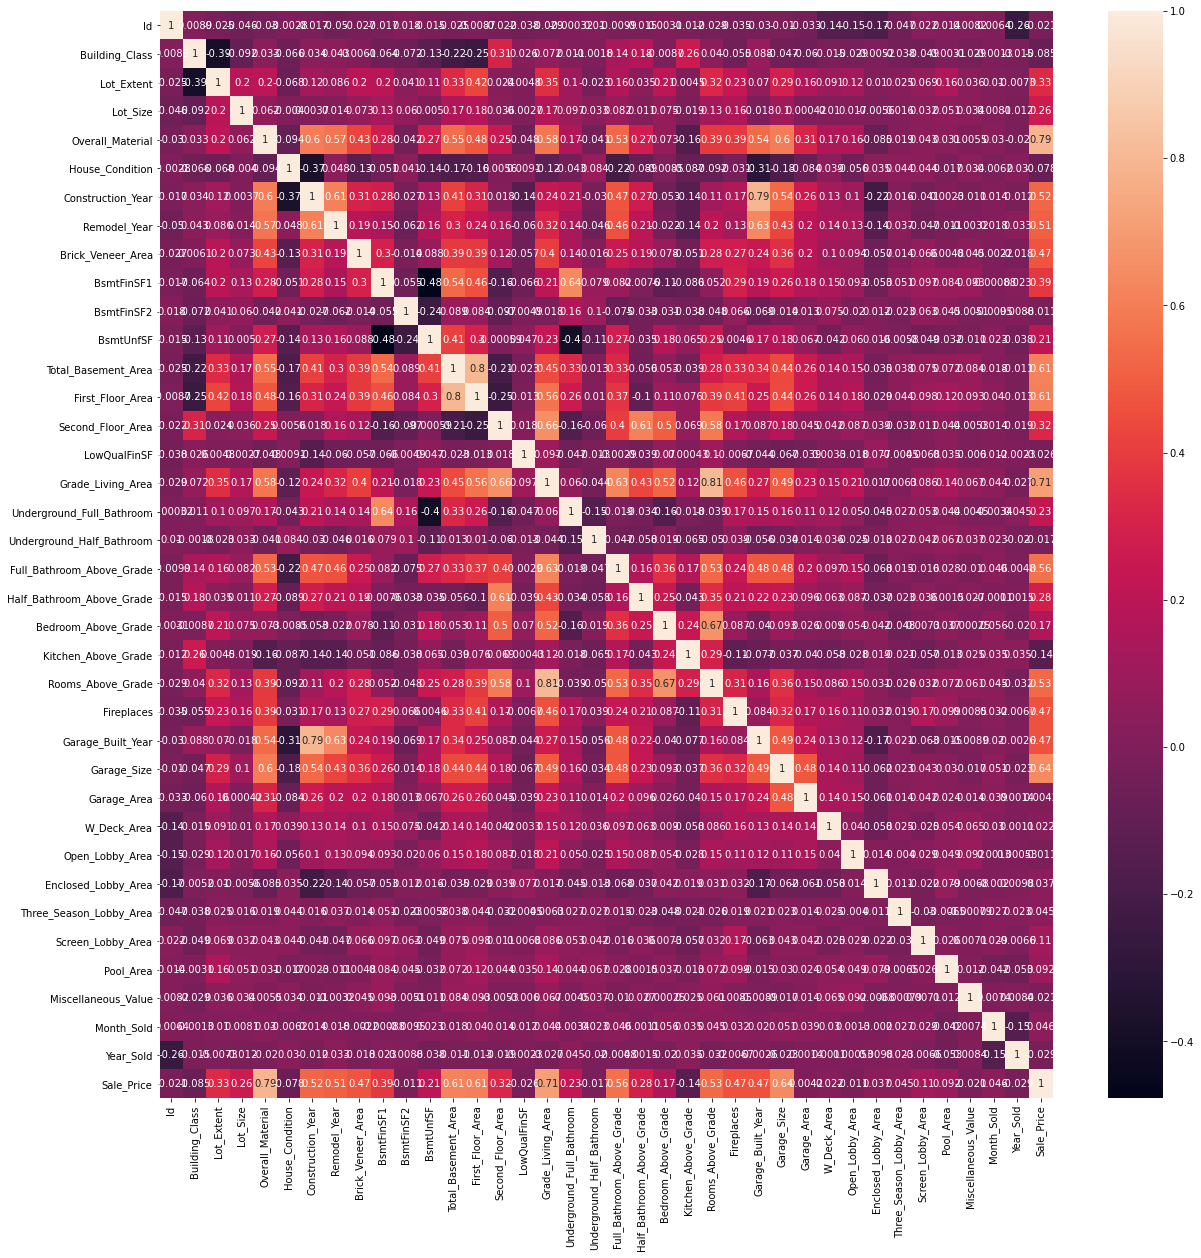

In [49]:
corr = not_null.corr()
top_features = corr.index #We will copy the indexes and store it in top_featues
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

There are variables which are having high multicolinearity
1. Construction_year and Garage_Built_Year
2. Room_Above_Grade and Grade_Living_Area

So, we can replace two of them(one from each- we will replace those which have less relation with dependent variable)

In [50]:
df.drop(['Rooms_Above_Grade','Garage_Built_Year','Garage_Area','Open_Lobby_Area','Miscellaneous_Value',
        'Month_Sold'],axis=1, inplace=True)

In [51]:
##So we have filled the Null values and removed the variables which are not important for the dataset.

In [52]:
## Now we will have a look at the categorical values of the dataset. 
#We will extract the categorical values from the dataset into a new dataset
cat = df.select_dtypes(include="O")
cat.head()

,Zoning_Class,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinType2,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,Kitchen_Quality,Functional_Rate,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Quality,Garage_Condition,Pavedd_Drive,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Sale_Type,Sale_Condition
0,RLD,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RLD,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,Gable,SS,MetalSd,MetalSd,None,TA,TA,CB,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,TF,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RLD,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RLD,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,Gable,SS,Wd Sdng,Wd Shng,None,TA,TA,BT,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,TF,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RLD,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [53]:
cat.isnull().sum()

Zoning_Class                4
Road_Type                   0
Lane_Type                2720
Property_Shape              0
Land_Outline                0
Utility_Type                2
Lot_Configuration           0
Property_Slope              0
Neighborhood                0
Condition1                  0
Condition2                  0
House_Type                  0
House_Design                0
Roof_Design                 0
Roof_Quality                0
Exterior1st                 1
Exterior2nd                 1
Brick_Veneer_Type          24
Exterior_Material           0
Exterior_Condition          0
Foundation_Type             0
Basement_Height            81
Basement_Condition         82
Exposure_Level             82
BsmtFinType1               79
BsmtFinType2               80
Heating_Type                0
Heating_Quality             0
Air_Conditioning            0
Electrical_System           1
Kitchen_Quality             1
Functional_Rate             2
Fireplace_Quality        1419
Garage    

In [54]:
#We will extract the columns where the null values are more than 1500
for i in cat.columns:
    if cat[i].isnull().sum()>1500:
        print(i)

Lane_Type
Pool_Quality
Fence_Quality
Miscellaneous_Feature


In [55]:
#There are only four variables which are having more than 50% of  the null. So we can remove them
df.drop(['Lane_Type','Pool_Quality','Fence_Quality','Miscellaneous_Feature'],axis=1,inplace=True)
#We will remove the variable from this temporary dataset also as we wll use this dataframe again
cat.drop(['Lane_Type','Pool_Quality','Fence_Quality','Miscellaneous_Feature'],axis=1,inplace=True)


C:\Users\mishr\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


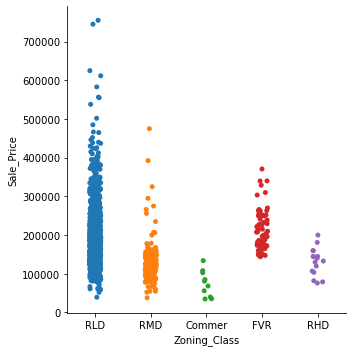

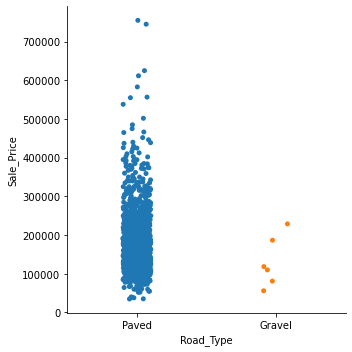

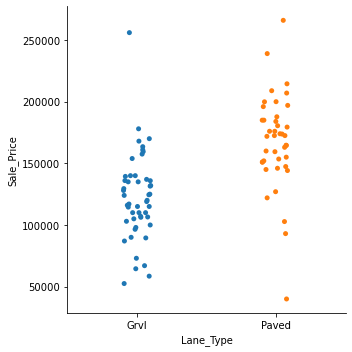

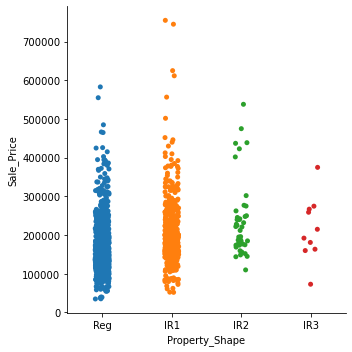

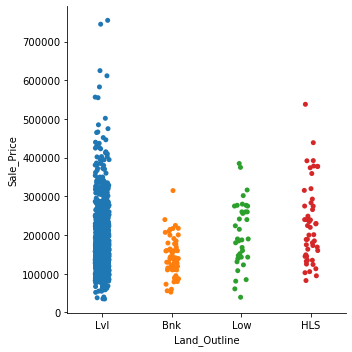

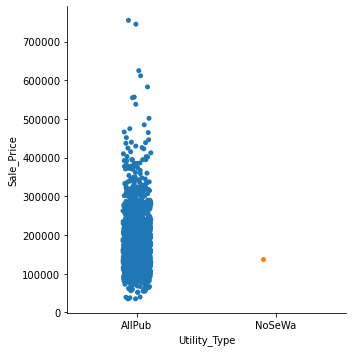

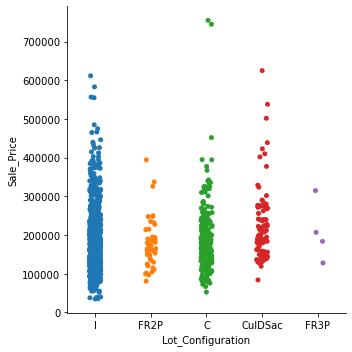

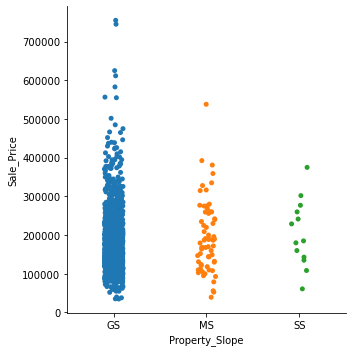

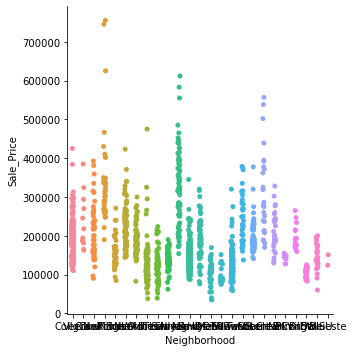

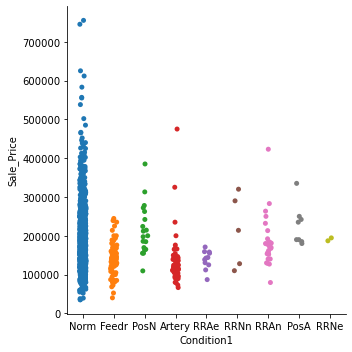

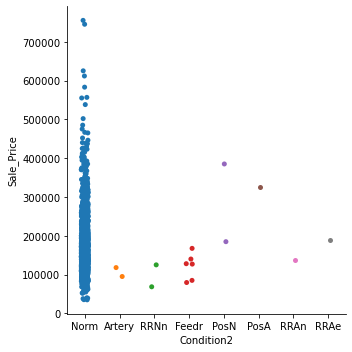

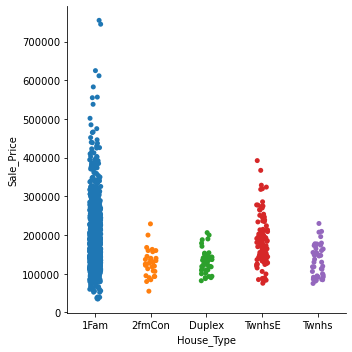

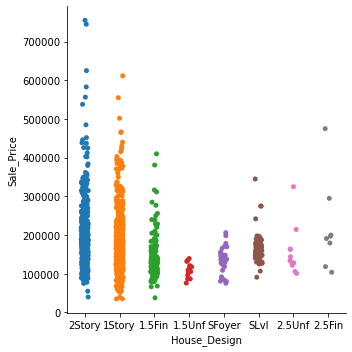

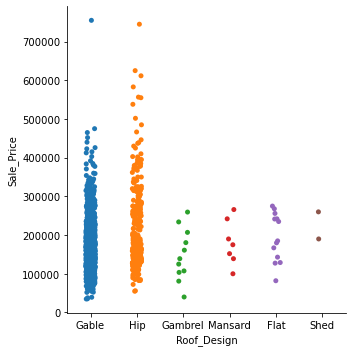

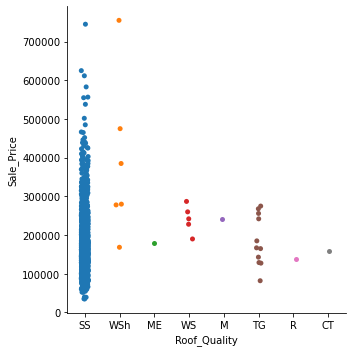

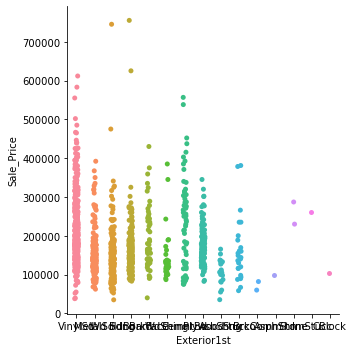

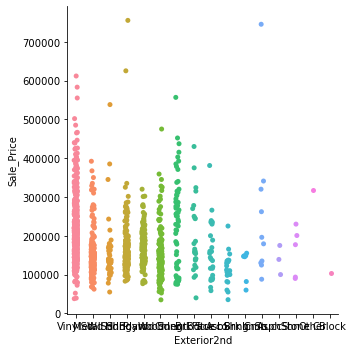

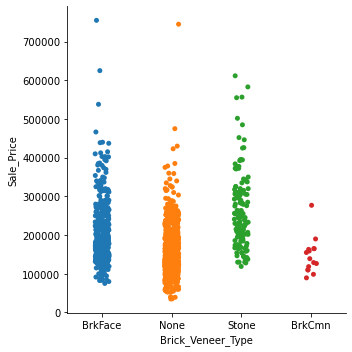

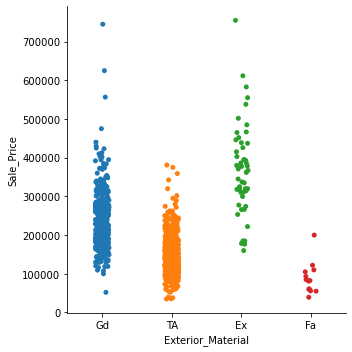

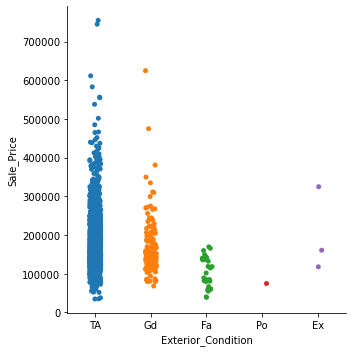

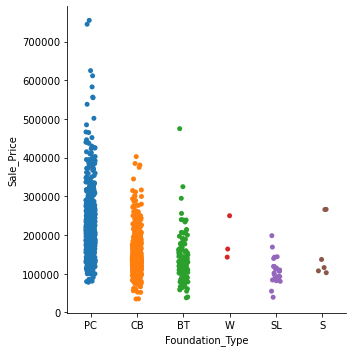

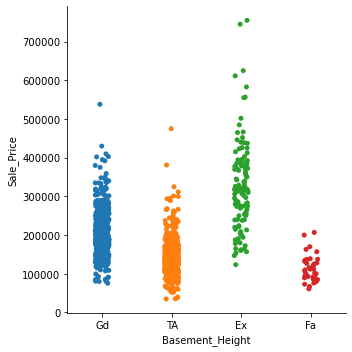

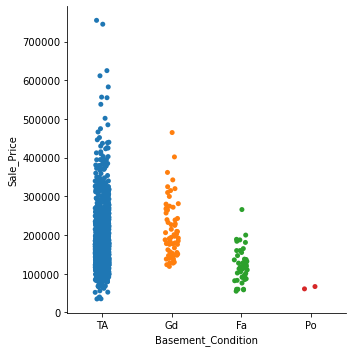

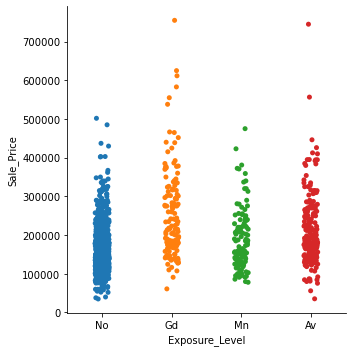

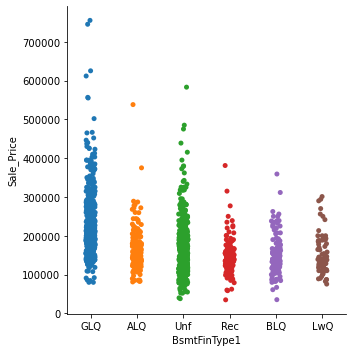

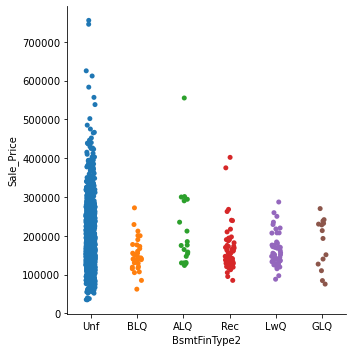

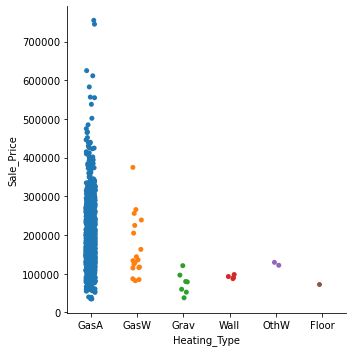

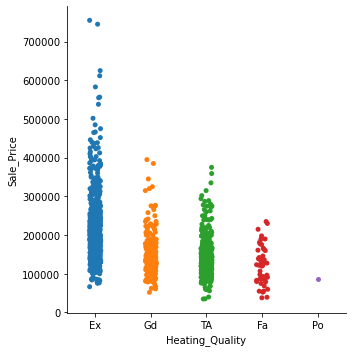

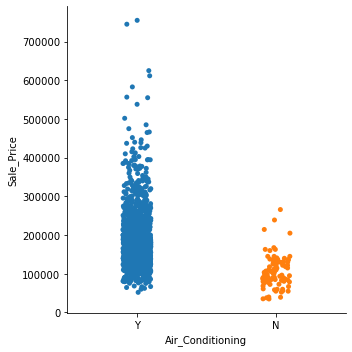

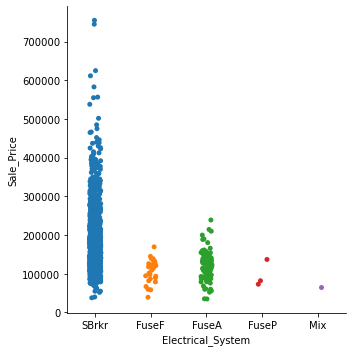

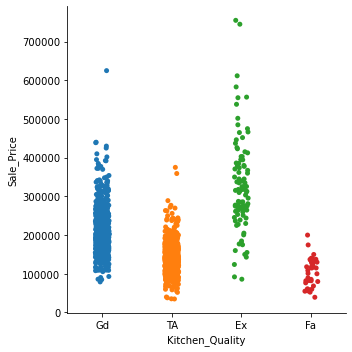

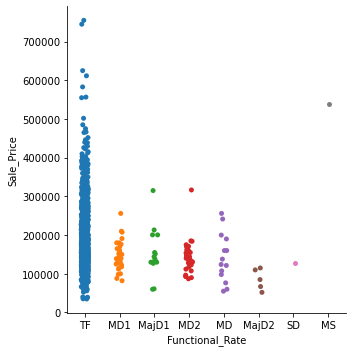

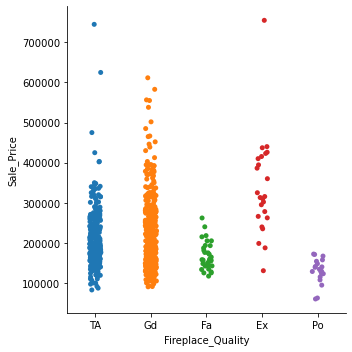

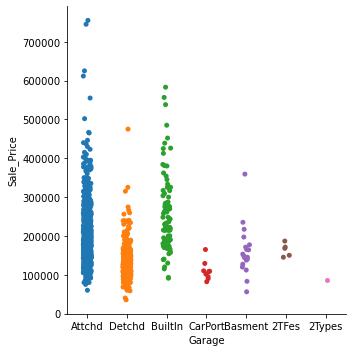

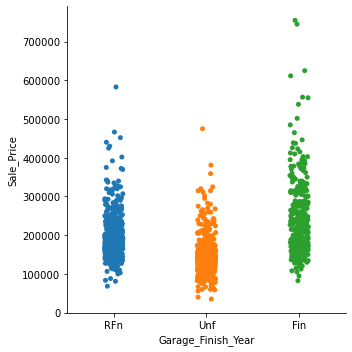

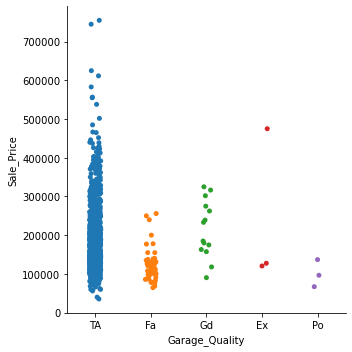

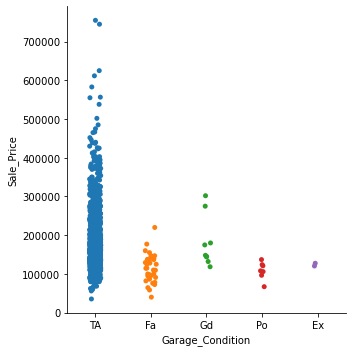

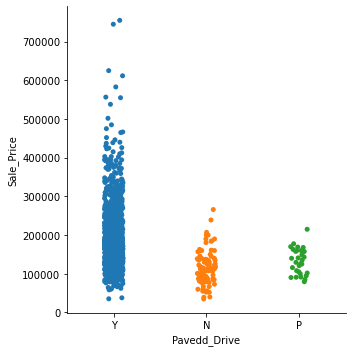

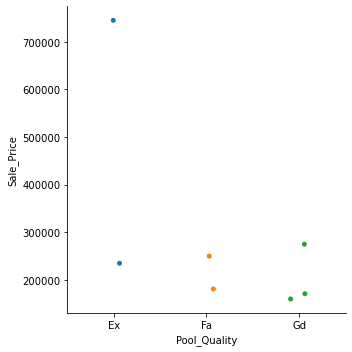

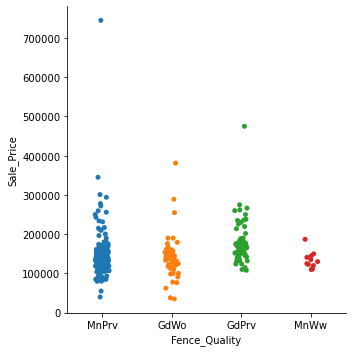

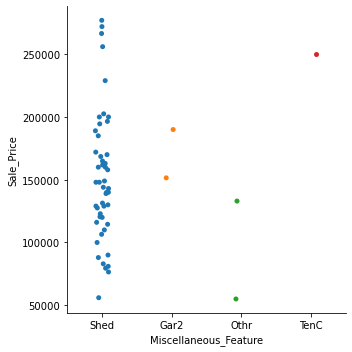

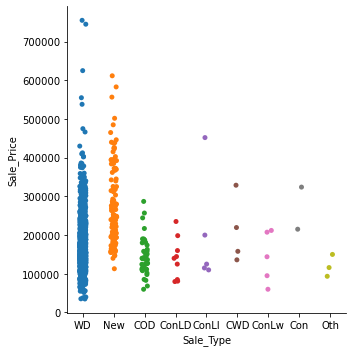

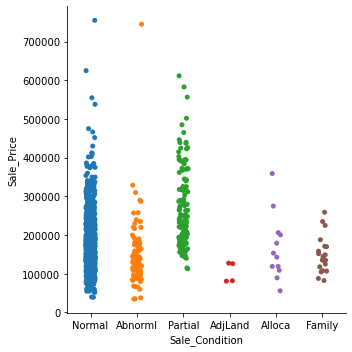

In [56]:
#We will see the category plot for the cateogorical data from the dataset
for i in train_df.columns:
    if train_df[i].dtype == "O":
        sns.catplot(x=i,y='Sale_Price',data=train_df)
        plt.show()

In [57]:
#We will see the null value again so that we can compare with the missing values
cat.isnull().sum()

Zoning_Class             4
Road_Type                0
Property_Shape           0
Land_Outline             0
Utility_Type             2
Lot_Configuration        0
Property_Slope           0
Neighborhood             0
Condition1               0
Condition2               0
House_Type               0
House_Design             0
Roof_Design              0
Roof_Quality             0
Exterior1st              1
Exterior2nd              1
Brick_Veneer_Type       24
Exterior_Material        0
Exterior_Condition       0
Foundation_Type          0
Basement_Height         81
Basement_Condition      82
Exposure_Level          82
BsmtFinType1            79
BsmtFinType2            80
Heating_Type             0
Heating_Quality          0
Air_Conditioning         0
Electrical_System        1
Kitchen_Quality          1
Functional_Rate          2
Fireplace_Quality     1419
Garage                 157
Garage_Finish_Year     159
Garage_Quality         159
Garage_Condition       159
Pavedd_Drive             0
S

In [58]:
#We will see some of the variables which are having one or two NaN 
df.loc[df['Exterior1st'].isnull()]

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
2150,2152,30,RLD,85.0,6022.039697,Paved,Reg,Lvl,AllPub,I,GS,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,TG,NaN,NaN,None,0.0,TA,TA,PC,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,TF,2,Gd,NaN,NaN,0.0,NaN,NaN,Y,0.0,0.0,0,0,0,2008,WD,Normal,NaN


In [59]:
#We will remove Row number 2150 and 2609
df.drop([2150,2609],axis=0,inplace=True)

In [60]:
#We will now see the NaN location of Exterior1st and Exterior2nd
df.loc[df['Fireplace_Quality'].isnull()]

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450.000000,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,TF,0,NaN,Attchd,RFn,2.0,TA,TA,Y,163.788080,20.337934,0,0,0,2008,WD,Normal,208500.0
5,6,50,RLD,85.0,14115.000000,Paved,IR1,Lvl,AllPub,I,GS,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,W,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,TF,0,NaN,Attchd,Unf,2.0,TA,TA,Y,0.621402,70.350362,320,0,0,2009,WD,Normal,143000.0
10,11,20,RLD,70.0,11200.000000,Paved,Reg,Lvl,AllPub,I,GS,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,SS,HdBoard,HdBoard,None,0.0,TA,TA,CB,TA,TA,No,Rec,906.0,Unf,0.0,134.0,1040.0,GasA,Ex,Y,SBrkr,1040,0,0,1040,1.0,0.0,1,0,3,1,TA,TF,0,NaN,Detchd,Unf,1.0,TA,TA,Y,185.564715,30.478397,0,0,0,2008,WD,Normal,129500.0
12,13,20,RLD,69.0,12968.000000,Paved,IR2,Lvl,AllPub,I,GS,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,SS,HdBoard,Plywood,None,0.0,TA,TA,CB,TA,TA,No,ALQ,737.0,Unf,0.0,175.0,912.0,GasA,TA,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,2,1,TA,TF,0,NaN,Detchd,Unf,1.0,TA,TA,Y,129.053257,19.654410,0,176,0,2008,WD,Normal,144000.0
15,16,45,RMD,51.0,6120.000000,Paved,Reg,Lvl,AllPub,C,GS,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,SS,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BT,TA,TA,No,Unf,0.0,Unf,0.0,832.0,832.0,GasA,Ex,Y,FuseA,854,0,0,854,0.0,0.0,1,0,2,1,TA,TF,0,NaN,Detchd,Unf,2.0,TA,TA,Y,34.684125,24.580227,0,0,0,2007,WD,Normal,132000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2913,160,RMD,21.0,12104.290990,Paved,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD,NoRMD,Twnhs,2Story,4,5,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,TA,TA,No,Rec,408.0,Unf,0.0,138.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,TF,0,NaN,CarPort,Unf,1.0,TA,TA,Y,0.000000,0.000000,0,0,0,2006,WD,AbnoRMDl,NaN
2912,2914,160,RMD,21.0,20033.272180,Paved,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD,NoRMD,Twnhs,2Story,4,5,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,TF,0,NaN,NaN,NaN,0.0,NaN,NaN,Y,0.000000,0.000000,0,0,0,2006,WD,NoRMDal,NaN
2913,2915,160,RMD,21.0,14584.838440,Paved,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD,NoRMD,Twnhs,2Story,4,7,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,TF,0,NaN,NaN,NaN,0.0,NaN,NaN,Y,0.000000,0.000000,0,0,0,2006,WD,NoRMDal,NaN
2914,2916,160,RMD,21.0,8072.991379,Paved,Reg,Lvl,AllPub,I,GS,MeadowV,NoRMD,NoRMD,TwnhsE,2Story,4,5,1970,1970,Gable,SS,CemntBd,Cm

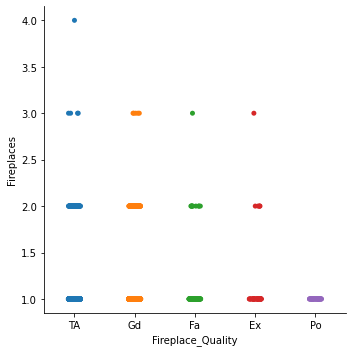

In [61]:
sns.catplot(x='Fireplace_Quality',y='Fireplaces',data=df)

In [62]:
#We should replace the NaN of the fireplace quality because there is a relation with number of fireplaces and there fireplace 
#number is 0 and we dpnt have any NA in the data set
df['Fireplace_Quality'].fillna("NA",inplace=True)

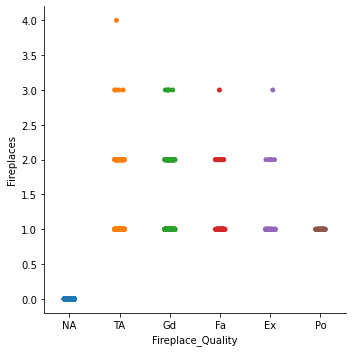

In [63]:
sns.catplot(x='Fireplace_Quality',y='Fireplaces',data=df)

We have replaces it correctly now

In [64]:
print(test_df.Zoning_Class.value_counts())
print(train_df.Zoning_Class.value_counts())

RLD       1114
RMD        242
FVR         74
Commer      15
RHD         10
Name: Zoning_Class, dtype: int64
RLD       1150
RMD        218
FVR         65
RHD         16
Commer      10
Name: Zoning_Class, dtype: int64


In [65]:
#Since the maximum number of rows belong to RLD category so we can replace NaN with RLD
df.Zoning_Class.fillna("RLD",inplace=True)

In [66]:
#We will now perform the value count of utility type variable
df['Utility_Type'].value_counts()

AllPub    2913
NoSeWa       1
Name: Utility_Type, dtype: int64

There are only two categories and that too only one house is having second category

WE will replace the NaN of Utlility_Count by AllPub and we will remove the row having the second category from the training
dataset because only training dataset is having that value

In [67]:
df['Utility_Type'].fillna("AllPub", inplace=True)

In [68]:
#we will now drop the row having utility type as NoSeWa
df.loc[df['Utility_Type']=="NoSeWa"] #CHecking the location
df.drop(944, axis=0, inplace=True)#Droping the row

In [69]:
#Since the variable is having only one cateogory we will create it in numerical 
df['Utility_Type'] = np.where(df['Utility_Type']=="AllPub",1,0)

In [70]:
#We will now check the location of the variable where NaN is present
df.loc[df['Brick_Veneer_Type'].isnull()]

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
234,235,60,RLD,69.0,7851.000000,Paved,Reg,Lvl,1,I,GS,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,SS,VinylSd,VinylSd,NaN,0.0,Gd,TA,PC,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,TF,2,TA,BuiltIn,Fin,2.0,TA,TA,Y,289.475456,81.115690,0,0,0,2010,WD,Normal,216500.0
529,530,20,RLD,69.0,32668.000000,Paved,IR1,Lvl,1,CulDSac,GS,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,SS,Wd Sdng,Stone,NaN,0.0,Gd,TA,PC,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,MajD1,2,TA,Attchd,RFn,2.0,TA,TA,Y,94.257067,24.580227,0,0,0,2007,WD,Alloca,200624.0
650,651,60,FVR,65.0,8125.000000,Paved,Reg,Lvl,1,I,GS,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,SS,CemntBd,CmentBd,NaN,0.0,Gd,TA,PC,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,1665,0.0,0.0,2,1,3,1,Gd,TF,0,NA,Attchd,RFn,2.0,TA,TA,Y,164.821666,24.580227,0,0,0,2008,WD,Normal,205950.0
936,937,20,RLD,67.0,10083.000000,Paved,Reg,Lvl,1,I,GS,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,NaN,0.0,Gd,TA,PC,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,TF,0,NA,Attchd,RFn,2.0,TA,TA,Y,139.506560,24.580227,0,0,0,2009,WD,Normal,184900.0
973,974,20,FVR,95.0,11639.000000,Paved,Reg,Lvl,1,C,GS,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,SS,CemntBd,CmentBd,NaN,0.0,Gd,TA,PC,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,TF,0,NA,Attchd,Fin,2.0,TA,TA,Y,203.835980,24.580227,0,0,0,2008,New,Partial,182000.0
977,978,120,FVR,35.0,4274.000000,Paved,IR1,Lvl,1,I,GS,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,SS,VinylSd,VinylSd,NaN,0.0,Gd,TA,PC,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,TF,0,NA,Attchd,Fin,2.0,TA,TA,Y,93.015667,137.448454,0,0,0,2007,New,Partial,199900.0
1243,1244,20,RLD,107.0,13891.000000,Paved,Reg,Lvl,1,I,GS,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,SS,VinylSd,VinylSd,NaN,0.0,Ex,TA,PC,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,TF,1,Gd,Attchd,Fin,3.0,TA,TA,Y,268.587068,24.580227,0,0,0,2006,New,Partial,465000.0
1278,1279,60,RLD,75.0,9473.000000,Paved,Reg,Lvl,1,I,GS,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,SS,VinylSd,VinylSd,NaN,0.0,Gd,TA,PC,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,TF,1,Gd,Attchd,RFn,2.0,TA,TA,Y,22.908877,116.161000,0,0,0,2008,WD,Normal,237000.0
1690,1692,60,RLD,69.0,15812.417600,Paved,IR1,Lvl,1,C,GS,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,SS,VinylSd,VinylSd,NaN,0.0,Gd,TA,PC,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,TF,1,Gd,BuiltIn,Fin,3.0,TA,TA,Y,0.000000,0.000000,0,0,0,2009,WD,Normal,NaN
1705,1707,20,FVR,90.0,15083.435860,Paved,IR1,Lvl,1,I,GS,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,SS,Viny

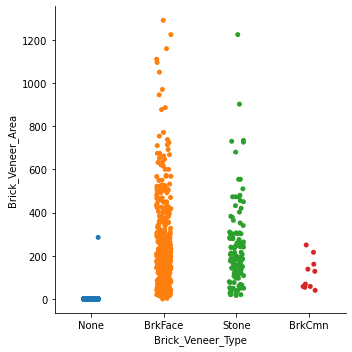

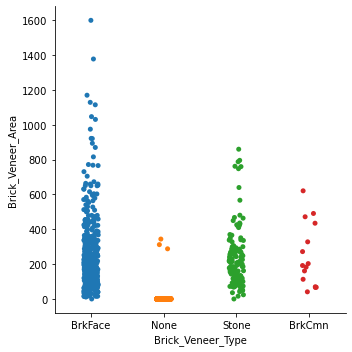

In [71]:
#We will try to see the relationship of Brick_Veneer_Type and Brick_Veneer_Area and then fill tha NaN accoding to that
#We will use catplot 

sns.catplot(x="Brick_Veneer_Type",y='Brick_Veneer_Area',data=test_df)

sns.catplot(x="Brick_Veneer_Type",y='Brick_Veneer_Area',data=train_df)
plt.show()

In [72]:
#So we can clearly see the majority of values having 0 Brick_Veneer_Area are having None type.
#So we will replace them accordingly.

In [73]:
df.Brick_Veneer_Type.fillna("None",inplace=True)

In [74]:
#We will see the Basement_Height category now
df.loc[df['Basement_Height'].isnull()].head(50)

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
17,18,90,RLD,72.0,10791.000000,Paved,Reg,Lvl,1,I,GS,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,SL,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1296,0,0,1296,0.0,0.0,2,0,2,2,TA,TF,0,NA,CarPort,Unf,2.0,TA,TA,Y,114.159130,24.580227,0,0,0,2006,WD,Normal,90000.0
39,40,90,RLD,65.0,6040.000000,Paved,Reg,Lvl,1,I,GS,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,SS,AsbShng,Plywood,None,0.0,TA,TA,PC,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseP,1152,0,0,1152,0.0,0.0,2,0,2,2,Fa,TF,0,NA,NaN,NaN,0.0,NaN,NaN,N,92.626742,178.232105,0,0,0,2008,WD,AdjLand,82000.0
90,91,20,RLD,60.0,7200.000000,Paved,Reg,Lvl,1,I,GS,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,SS,BrkFace,Wd Sdng,None,0.0,TA,TA,SL,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1040,0,0,1040,0.0,0.0,1,0,2,1,TA,TF,0,NA,Detchd,Unf,2.0,TA,TA,Y,93.015667,1.178925,0,0,0,2006,WD,Normal,109900.0
102,103,90,RLD,64.0,7018.000000,Paved,Reg,Bnk,1,I,GS,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,SS,HdBoard,HdBoard,None,0.0,TA,Fa,SL,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1535,0,0,1535,0.0,0.0,2,0,4,2,TA,TF,0,NA,Attchd,Unf,2.0,TA,TA,Y,278.134791,40.282604,0,0,0,2009,WD,Alloca,118964.0
156,157,20,RLD,60.0,7200.000000,Paved,Reg,Lvl,1,I,GS,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,SS,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CB,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseF,1040,0,0,1040,0.0,0.0,1,0,2,1,TA,TF,0,NA,Detchd,Unf,2.0,TA,TA,Y,256.545013,24.580227,0,0,0,2006,WD,Normal,109500.0
182,183,20,RLD,60.0,9060.000000,Paved,Reg,Lvl,1,I,GS,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,SS,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PC,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0.0,0.0,1,0,3,1,TA,TF,1,Gd,Attchd,RFn,1.0,TA,TA,Y,225.690756,7.470701,180,0,0,2007,WD,Normal,120000.0
259,260,20,RMD,70.0,12702.000000,Paved,Reg,Lvl,1,I,GS,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,SS,BrkFace,BrkFace,None,0.0,TA,TA,PC,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,FuseA,882,0,0,882,0.0,0.0,1,0,2,1,TA,TF,0,NA,Detchd,Unf,1.0,TA,TA,Y,189.689345,49.081189,0,0,0,2008,WD,Normal,97000.0
342,343,90,RLD,69.0,8544.000000,Paved,Reg,Lvl,1,I,GS,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,SS,Stucco,Stucco,BrkFace,340.0,TA,TA,SL,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Fa,N,FuseA,1040,0,0,1040,0.0,0.0,2,0,2,2,TA,TF,0,NA,Detchd,Unf,2.0,TA,TA,Y,93.015667,24.580227,0,0,0,2006,WD,Normal,87500.0
362,363,85,RLD,64.0,7301.000000,Paved,Reg,Lvl,1,C,GS,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,SS,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,SL,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0.0,0.0,3,0,4,1,Gd,TF,1,Ex,BuiltIn,RFn,2.0,TA,TA,Y,60.849666,24.580227,0,0,0,2009,ConLD,Normal,198500.0
371,372,50,RLD,80.0,17120.000000,Paved,Reg,Lvl,1,I,GS,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,SS,WdShing,Plywood,None,0.0,TA,TA,CB,NaN,NaN,NaN,NaN,0

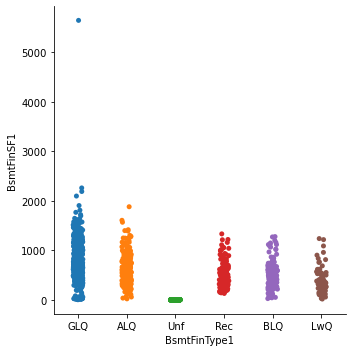

In [75]:
#Since there are 4 columns related to basement we will now see their relation with surace area of basement
sns.catplot(x='BsmtFinType1',y='BsmtFinSF1',data=train_df)

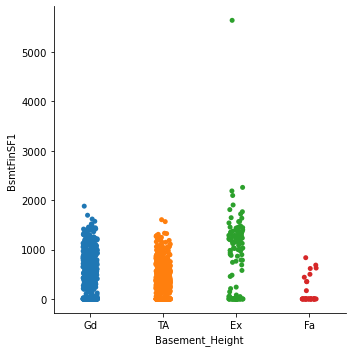

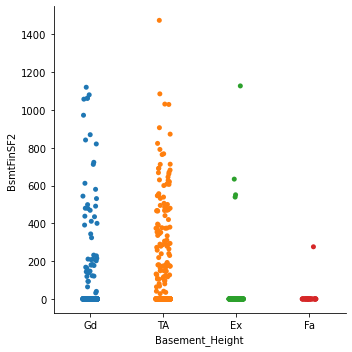

In [76]:
sns.catplot(x='Basement_Height',y='BsmtFinSF1',data=train_df)
sns.catplot(x='Basement_Height',y='BsmtFinSF2',data=train_df)

From this we can check that there most of the values whether that is of Gd, TA, Ex, Fa most of them have 0 BsmtFinSF2. There are very few values having Fa as a category and more than 0 BsmtFinSF2 despite of train and test dataset.

In [77]:
train_df.loc[train_df['BsmtFinType1'].isnull()]

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
17,18,90,RLD,72.0,10791,Paved,NaN,Reg,Lvl,AllPub,I,GS,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,SL,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,TF,0,NaN,CarPort,1967.0,Unf,2,200.203887,TA,TA,Y,114.159130,4.615600,-13.433509,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RLD,65.0,6040,Paved,NaN,Reg,Lvl,AllPub,I,GS,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,SS,AsbShng,Plywood,None,0.0,TA,TA,PC,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,TF,0,NaN,NaN,NaN,NaN,0,136.244522,NaN,NaN,N,92.626742,-51.333606,178.232105,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RLD,60.0,7200,Paved,NaN,Reg,Lvl,AllPub,I,GS,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,SS,BrkFace,Wd Sdng,None,0.0,TA,TA,SL,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,TF,0,NaN,Detchd,1950.0,Unf,2,468.644465,TA,TA,Y,-41.188421,43.317331,1.178925,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RLD,64.0,7018,Paved,NaN,Reg,Bnk,AllPub,I,GS,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,SS,HdBoard,HdBoard,None,0.0,TA,Fa,SL,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,TF,0,NaN,Attchd,1979.0,Unf,2,329.456188,TA,TA,Y,278.134791,42.796995,40.282604,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RLD,60.0,7200,Paved,NaN,Reg,Lvl,AllPub,I,GS,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,SS,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CB,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,TF,0,NaN,Detchd,1950.0,Unf,2,269.907607,TA,TA,Y,256.545013,45.817361,-15.020404,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RLD,60.0,9060,Paved,NaN,Reg,Lvl,AllPub,I,GS,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,SS,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PC,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,TF,1,Gd,Attchd,1957.0,RFn,1,745.119900,TA,TA,Y,225.690756,146.440457,7.470701,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RMD,70.0,12702,Paved,NaN,Reg,Lvl,AllPub,I,GS,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,SS,BrkFace,BrkFace,None,0.0,TA,TA,PC,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,TF,0,NaN,Detchd,1956.0,Unf,1,386.557274,TA,TA,Y,189.689345,57.905856,49.081189,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RLD,NaN,8544,Paved,NaN,Reg,Lvl,AllPub,I,GS,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,SS,Stucco,Stucco,BrkFace,340.0,TA,TA,SL,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,TF,0,NaN,Detchd,1949.0,Unf,2,38.984100,TA,TA,Y,-6.882766,112.423742,-33.052751,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RLD,64.0,7301,Paved,NaN,Reg,Lvl,AllPub,C

Since there is 0 surface area so we can replace the Basement_Height, Basement_Condition, Exposure_Level, BsmtFinType1, BsmtFinType2 with NA

In [78]:
df.Basement_Height.fillna("NA", inplace=True)
df.Basement_Condition.fillna("NA", inplace=True)
df.Exposure_Level.fillna("NA", inplace=True)
df.BsmtFinType1.fillna("NA", inplace=True)
df.BsmtFinType2.fillna("NA", inplace=True)

In [79]:
# For Electrical_System, Kitchen_Quality, Functional_Rate we will replace the NAN with their mode
df.Electrical_System.fillna(df.Electrical_System.mode()[0], inplace=True)
df.Kitchen_Quality.fillna(df.Kitchen_Quality.mode()[0], inplace=True)
df.Functional_Rate.fillna(df.Functional_Rate.mode()[0], inplace=True)

In [80]:
# we will now see Garage, Garage_Finish_Year, Garage_Quality, Garage_Condition variables and try to find out the relationship
#between them

df.loc[df['Garage'].isnull()]

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
39,40,90,RLD,65.0,6040.000000,Paved,Reg,Lvl,1,I,GS,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,SS,AsbShng,Plywood,None,0.0,TA,TA,PC,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,N,FuseP,1152,0,0,1152,0.0,0.0,2,0,2,2,Fa,TF,0,NA,NaN,NaN,0.0,NaN,NaN,N,92.626742,178.232105,0,0,0,2008,WD,AdjLand,82000.0
48,49,190,RMD,33.0,4456.000000,Paved,Reg,Lvl,1,I,GS,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,BT,TA,TA,No,Unf,0.0,Unf,0.0,736.0,736.0,GasA,Gd,Y,SBrkr,736,716,0,1452,0.0,0.0,2,0,2,3,TA,TF,0,NA,NaN,NaN,0.0,NaN,NaN,N,34.030355,90.335479,0,0,0,2009,New,Partial,113000.0
78,79,90,RLD,72.0,10778.000000,Paved,Reg,Lvl,1,I,GS,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,SS,HdBoard,HdBoard,None,0.0,TA,TA,CB,TA,TA,No,Unf,0.0,Unf,0.0,1768.0,1768.0,GasA,TA,N,SBrkr,1768,0,0,1768,0.0,0.0,2,0,4,2,TA,TF,0,NA,NaN,NaN,0.0,NaN,NaN,Y,21.001824,169.735041,0,0,0,2010,WD,Normal,136500.0
88,89,50,Commer,105.0,8470.000000,Paved,IR1,Lvl,1,C,GS,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,SS,Plywood,Plywood,None,0.0,Fa,Fa,CB,TA,Fa,No,Unf,0.0,Unf,0.0,1013.0,1013.0,GasA,TA,N,SBrkr,1013,0,513,1526,0.0,0.0,1,0,2,1,Fa,TF,0,NA,NaN,NaN,0.0,NaN,NaN,N,93.015667,24.580227,0,0,0,2009,ConLD,Abnorml,85000.0
89,90,20,RLD,60.0,8070.000000,Paved,Reg,Lvl,1,I,GS,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,PC,Gd,TA,No,GLQ,588.0,Unf,0.0,402.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,TF,0,NA,NaN,NaN,0.0,NaN,NaN,Y,253.161558,46.303681,0,0,0,2007,WD,Normal,123600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,2894,50,Commer,60.0,16987.068960,Gravel,Reg,Bnk,1,I,GS,IDOTRR,Norm,Norm,1Fam,1.5Fin,3,5,1916,1950,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,PC,Fa,Fa,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,Fa,N,SBrkr,576,360,0,936,0.0,0.0,1,0,2,1,TA,TF,0,NA,NaN,NaN,0.0,NaN,NaN,N,0.000000,0.000000,0,0,0,2006,WD,Normal,NaN
2908,2910,180,RMD,21.0,594.221288,Paved,Reg,Lvl,1,I,GS,MeadowV,NoRMD,NoRMD,Twnhs,SFoyer,4,6,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,Gd,TA,Av,GLQ,522.0,Unf,0.0,108.0,630.0,GasA,TA,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,TA,TF,0,NA,NaN,NaN,0.0,NaN,NaN,Y,0.000000,0.000000,0,0,0,2006,WD,NoRMDal,NaN
2912,2914,160,RMD,21.0,20033.272180,Paved,Reg,Lvl,1,I,GS,MeadowV,NoRMD,NoRMD,Twnhs,2Story,4,5,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,TF,0,NA,NaN,NaN,0.0,NaN,NaN,Y,0.000000,0.000000,0,0,0,2006,WD,NoRMDal,NaN
2913,2915,160,RMD,21.0,14584.838440,Paved,Reg,Lvl,1,I,GS,MeadowV,NoRMD,NoRMD,Twnhs,2Story,4,7,1970,1970,Gable,SS,CemntBd,CmentBd,None,0.0,TA,TA,CB,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,

In [81]:
#We can again replace the NaN with NA again
#Garage, Garage_Finish_Year, Garage_Quality, Garage_Condition
df.Garage.fillna("NA", inplace=True)
df.Garage_Finish_Year.fillna("NA", inplace=True)
df.Garage_Quality.fillna("NA", inplace=True)
df.Garage_Condition.fillna("NA", inplace=True)

In [82]:
df.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450.0,Paved,Reg,Lvl,1,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,TF,0,NA,Attchd,RFn,2.0,TA,TA,Y,163.788080,20.337934,0,0,0,2008,WD,Normal,208500.0
1,2,20,RLD,80.0,9600.0,Paved,Reg,Lvl,1,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,TF,1,TA,Attchd,RFn,2.0,TA,TA,Y,198.900074,15.039392,0,0,0,2007,WD,Normal,181500.0
2,3,60,RLD,68.0,11250.0,Paved,IR1,Lvl,1,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,TF,1,TA,Attchd,RFn,2.0,TA,TA,Y,26.127533,24.580227,0,0,0,2008,WD,Normal,223500.0
3,4,70,RLD,60.0,9550.0,Paved,IR1,Lvl,1,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,TF,1,Gd,Detchd,Unf,3.0,TA,TA,Y,46.948018,60.921821,0,0,0,2006,WD,Abnorml,140000.0
4,5,60,RLD,84.0,14260.0,Paved,IR1,Lvl,1,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,TF,1,TA,Attchd,RFn,3.0,TA,TA,Y,93.015667,21.788818,0,0,0,2008,WD,Normal,250000.0


In [83]:
#We will look campare constructin date and sold date
df.loc[df['Construction_Year']>df['Year_Sold']]

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
2548,2550,20,RLD,128.0,16681.19861,Paved,IR1,Bnk,1,I,GS,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,SS,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PC,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,TF,2,Gd,Attchd,Fin,3.0,TA,TA,Y,546.0,0.0,0,0,0,2007,New,Partial,NaN


According to this dataset location 2548 Construction date is greater than year sold. This case is not possible as someone can not sell home without constructing.

In [84]:
#We will make a new column which will tell the age of the house
df['Age_of_house'] = df['Year_Sold']-df['Construction_Year']
df['Age_of_house'].head()

0     5
1    31
2     7
3    91
4     8
Name: Age_of_house, dtype: int64

In [85]:
#In this column there will be a variable which will have negative age so we will change thatand keep it to 0
df['Age_of_house'] = np.where(df['Age_of_house']<0, 0, df['Age_of_house'])

In [86]:
#We can now remove Construction_Year column and use age of column instead of this
df.drop('Construction_Year',axis=1,inplace=True)

## Outliers

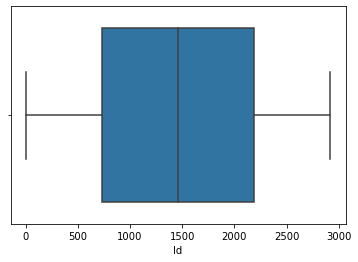

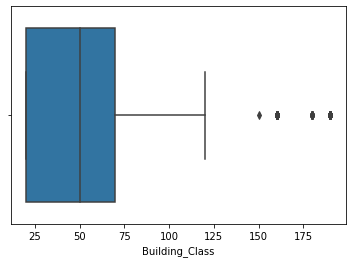

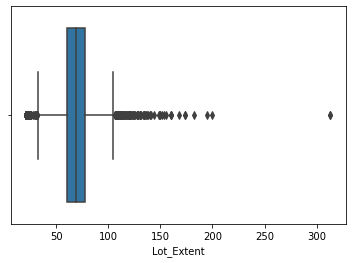

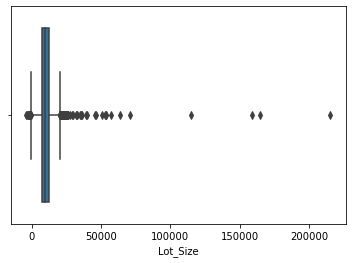

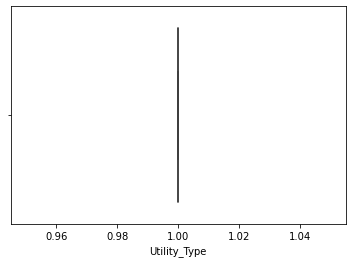

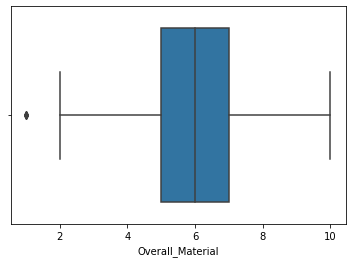

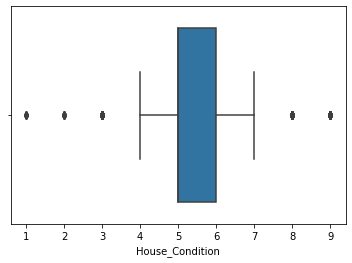

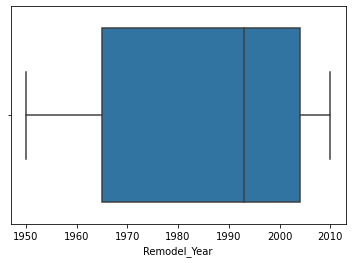

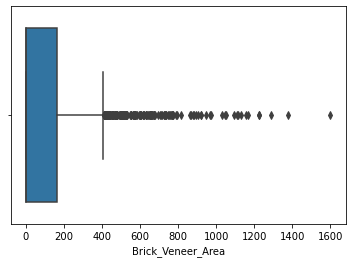

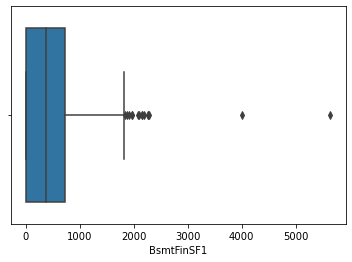

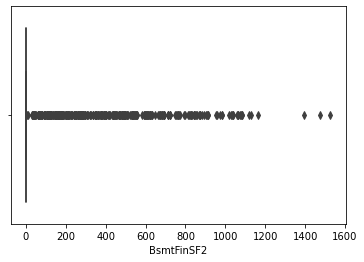

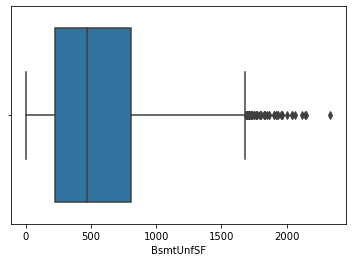

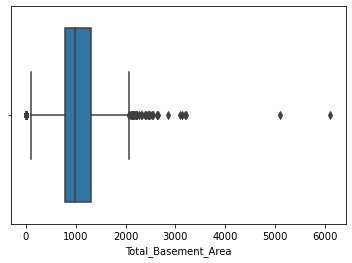

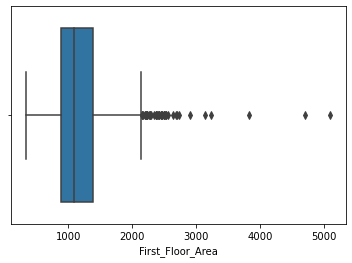

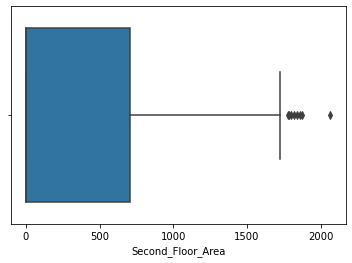

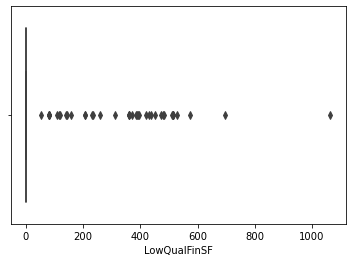

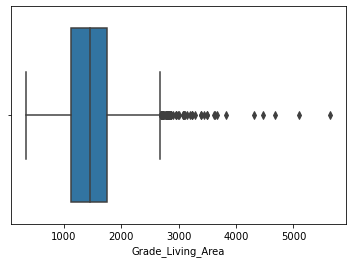

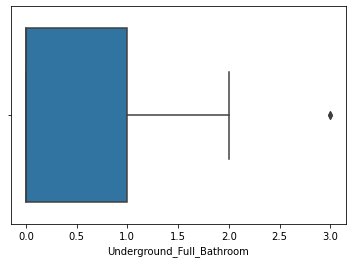

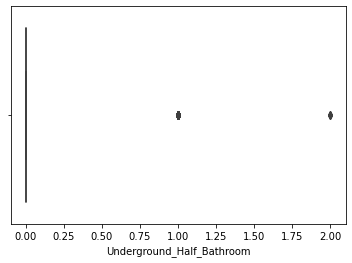

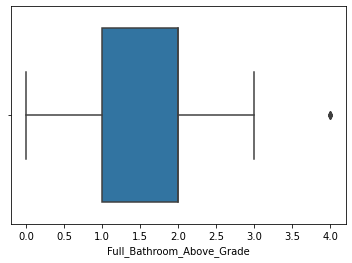

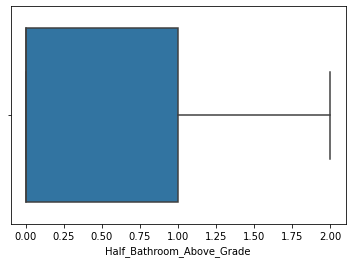

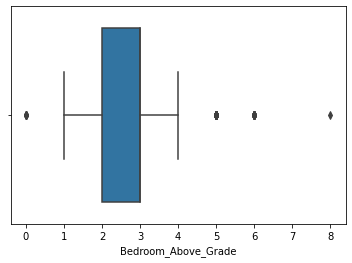

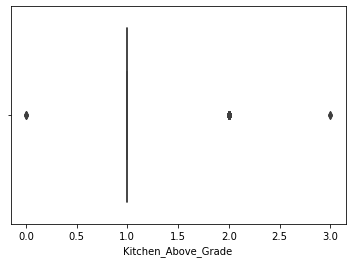

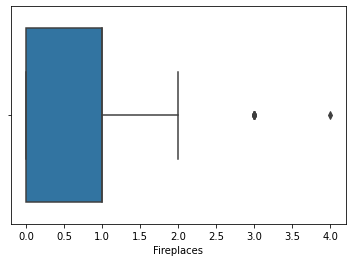

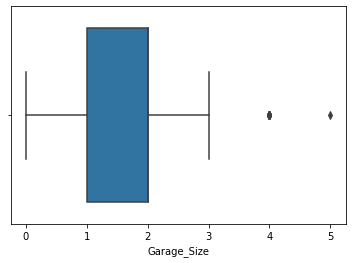

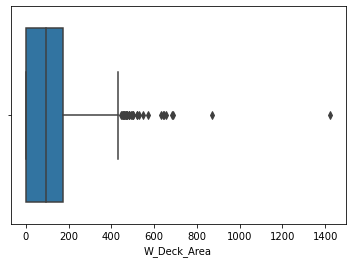

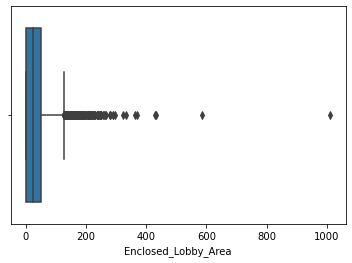

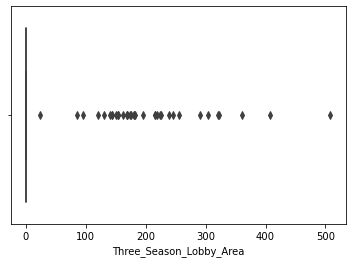

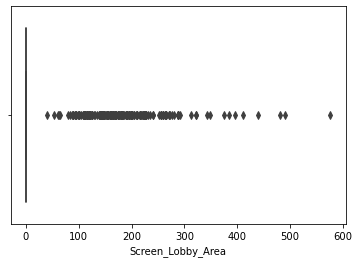

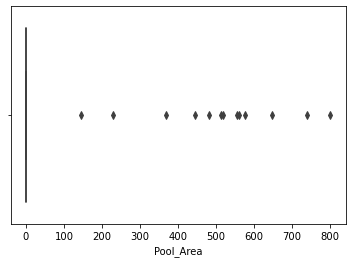

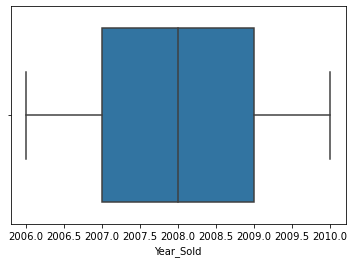

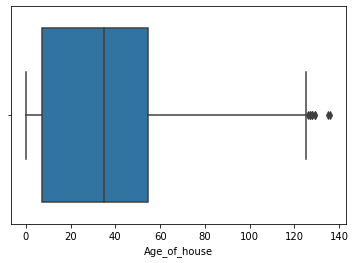

In [87]:
for data in df.columns:
    if df[data].dtype != "O" and data!= "Sale_Price":
        sns.boxplot(df[data])
        plt.show()

In [88]:
df.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Age_of_house
0,1,60,RLD,65.0,8450.0,Paved,Reg,Lvl,1,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,TF,0,NA,Attchd,RFn,2.0,TA,TA,Y,163.788080,20.337934,0,0,0,2008,WD,Normal,208500.0,5
1,2,20,RLD,80.0,9600.0,Paved,Reg,Lvl,1,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,TF,1,TA,Attchd,RFn,2.0,TA,TA,Y,198.900074,15.039392,0,0,0,2007,WD,Normal,181500.0,31
2,3,60,RLD,68.0,11250.0,Paved,IR1,Lvl,1,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,TF,1,TA,Attchd,RFn,2.0,TA,TA,Y,26.127533,24.580227,0,0,0,2008,WD,Normal,223500.0,7
3,4,70,RLD,60.0,9550.0,Paved,IR1,Lvl,1,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,TF,1,Gd,Detchd,Unf,3.0,TA,TA,Y,46.948018,60.921821,0,0,0,2006,WD,Abnorml,140000.0,91
4,5,60,RLD,84.0,14260.0,Paved,IR1,Lvl,1,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,TF,1,TA,Attchd,RFn,3.0,TA,TA,Y,93.015667,21.788818,0,0,0,2008,WD,Normal,250000.0,8


In [89]:
df.describe()

,Id,Building_Class,Lot_Extent,Lot_Size,Utility_Type,Overall_Material,House_Condition,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Fireplaces,Garage_Size,W_Deck_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Year_Sold,Sale_Price,Age_of_house
count,2915.000000,2915.000000,2915.000000,2915.000000,2915.0,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,1458.000000,2915.000000
mean,1459.544425,57.185249,69.228816,10193.306035,1.0,6.090566,5.564666,1984.280274,101.281647,441.052830,49.412350,560.957804,1051.467238,1159.208576,336.945455,4.700858,1500.854889,0.429503,0.061063,1.568782,0.380446,2.860377,1.044597,0.596913,1.767753,112.238597,35.728240,2.605832,16.004460,2.254889,2007.792453,180973.899863,36.459005
std,842.944134,42.527112,21.300868,7891.679107,0.0,1.410093,1.112505,20.891277,178.763197,455.564375,169.137532,439.685014,440.802397,392.468129,428.814163,46.428331,506.365617,0.524703,0.245153,0.552948,0.502938,0.823091,0.214603,0.645818,0.761047,109.450486,55.486170,25.205266,56.076704,35.688318,1.315583,79484.029761,30.349010
min,1.000000,20.000000,21.000000,-4265.104479,1.0,1.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000,0.000000
25%,729.500000,20.000000,60.000000,7135.000000,1.0,5.000000,5.000000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1125.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129925.000000,7.000000
50%,1459.000000,50.000000,69.000000,9600.000000,1.0,6.000000,5.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,2.000000,93.015667,24.580227,0.000000,0.000000,0.000000,2008.000000,163000.000000,35.000000
75%,2189.500000,70.000000,78.000000,12335.000000,1.0,7.000000,6.000000,2004.000000,163.000000,732.500000,0.000000,806.000000,1302.000000,1385.500000,704.000000,0.000000,1745.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,173.374561,50.402584,0.000000,0.000000,0.000000,2009.000000,214000.000000,54.500000
max,2919.000000,190.000000,313.000000,215245.000000,1.0,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,4.000000,5.000000,1424.000000,1012.000000,508.000000,576.000000,800.000000,2010.000000,755000.000000,136.000000


#### There are some of the columns which have almost all the values 0.
1. LowQualFinSF
2. Three_Season_Lobby_Area
3. Screen_Lobby_Area
4. Pool_Area

In [90]:
#We will remove these variables as there almost 75 percentile values are 0
df.drop(['Pool_Area','Three_Season_Lobby_Area','Screen_Lobby_Area','Pool_Area'],axis=1, inplace=True)

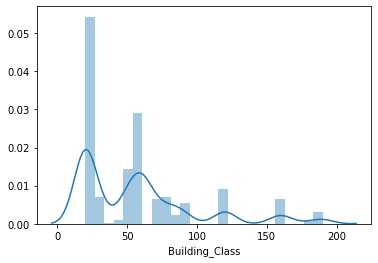

In [91]:
## We will handle the outliers for each variables seprately
sns.distplot(df['Building_Class'])

We will replace the upper outliers of all the variables with 90 percentile and ignore lower outliers as there are very few

In [92]:
IQR = df.Building_Class.quantile(0.75)-df.Building_Class.quantile(0.25)
df.loc[df['Building_Class']>df['Building_Class'].quantile(0.75)+(IQR*1.5), 'Building_Class']=df['Building_Class'].quantile(0.90)

In [93]:
IQR = df.Lot_Extent.quantile(0.75) - df.Lot_Extent.quantile(0.25)
upper = df.Lot_Extent.quantile(0.75) + (IQR*1.5)
df.loc[df['Lot_Extent']>upper,'Lot_Extent']=df.Lot_Extent.quantile(0.90)
#If there is any outlier left now we will ignore them

In [94]:
IQR = df.Lot_Size.quantile(0.75) - df.Lot_Size.quantile(0.25)
upper = df.Lot_Size.quantile(0.75) + (IQR*1.5)
df.loc[df['Lot_Size']>upper,'Lot_Size']=df.Lot_Size.quantile(0.90)

In [95]:
IQR = df.BsmtFinSF1.quantile(0.75) - df.BsmtFinSF1.quantile(0.25)
upper = df.BsmtFinSF1.quantile(0.75) + (IQR*1.5)
df.loc[df['BsmtFinSF1']>upper,'BsmtFinSF1']=df.BsmtFinSF1.quantile(0.90)

In [96]:
#BsmtFinSF2 can be removed or we have to replace the outliers with 0.
df.drop('BsmtFinSF2',axis=1,inplace=True)

In [97]:
IQR = df.BsmtUnfSF.quantile(0.75) - df.BsmtUnfSF.quantile(0.25)
upper = df.BsmtUnfSF.quantile(0.75) + (IQR*1.5)
df.loc[df['BsmtUnfSF']>upper,'BsmtUnfSF']=df.BsmtUnfSF.quantile(0.90)

In [98]:
IQR = df.Total_Basement_Area.quantile(0.75) - df.Total_Basement_Area.quantile(0.25)
upper = df.Total_Basement_Area.quantile(0.75) + (IQR*1.5)
df.loc[df['Total_Basement_Area']>upper,'Total_Basement_Area']=df.Total_Basement_Area.quantile(0.90)

In [99]:
IQR = df.First_Floor_Area.quantile(0.75) - df.First_Floor_Area.quantile(0.25)
upper = df.First_Floor_Area.quantile(0.75) + (IQR*1.5)
df.loc[df['First_Floor_Area']>upper,'First_Floor_Area']=df.First_Floor_Area.quantile(0.90)

In [100]:
IQR = df.Second_Floor_Area.quantile(0.75) - df.Second_Floor_Area.quantile(0.25)
upper = df.Second_Floor_Area.quantile(0.75) + (IQR*1.5)
df.loc[df['Second_Floor_Area']>upper,'Second_Floor_Area']=df.Second_Floor_Area.quantile(0.90)

In [101]:
IQR = df.Grade_Living_Area.quantile(0.75) - df.Grade_Living_Area.quantile(0.25)
upper = df.Grade_Living_Area.quantile(0.75) + (IQR*1.5)
df.loc[df['Grade_Living_Area']>upper,'Grade_Living_Area']=df.Grade_Living_Area.quantile(0.90)

In [102]:
IQR = df.W_Deck_Area.quantile(0.75) - df.W_Deck_Area.quantile(0.25)
upper = df.W_Deck_Area.quantile(0.75) + (IQR*1.5)
df.loc[df['W_Deck_Area']>upper,'W_Deck_Area']=df.W_Deck_Area.quantile(0.90)

In [103]:
IQR = df.Enclosed_Lobby_Area.quantile(0.75) - df.Enclosed_Lobby_Area.quantile(0.25)
upper = df.Enclosed_Lobby_Area.quantile(0.75) + (IQR*1.5)
df.loc[df['Enclosed_Lobby_Area']>upper,'Enclosed_Lobby_Area']=df.Enclosed_Lobby_Area.quantile(0.90)

In [104]:
IQR = df.Age_of_house.quantile(0.75) - df.Age_of_house.quantile(0.25)
upper = df.Age_of_house.quantile(0.75) + (IQR*1.5)
df.loc[df['Age_of_house']>upper,'Age_of_house']=df.Age_of_house.quantile(0.90)

###### Dummy Variables

In [105]:
#df = pd.get_dummies(df,drop_first=True)

In [106]:
#We will now check the value counts for all the variables
for data in df.columns:
    if df[data].dtype == "O":
        print(df[data].value_counts())
        print("=============")

RLD       2265
RMD        460
FVR        139
RHD         26
Commer      25
Name: Zoning_Class, dtype: int64
Paved     2903
Gravel      12
Name: Road_Type, dtype: int64
Reg    1856
IR1     967
IR2      76
IR3      16
Name: Property_Shape, dtype: int64
Lvl    2618
HLS     120
Bnk     117
Low      60
Name: Land_Outline, dtype: int64
I          2130
C           511
CulDSac     175
FR2P         85
FR3P         14
Name: Lot_Configuration, dtype: int64
GS    2774
MS     125
SS      16
Name: Property_Slope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    192
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    113
BrkSide    108
Crawfor    103
IDOTRR      93
NoRidge     71
Timber      71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64
Norm      2301
NoRMD      206
Feedr      164
Artery      92
RRAn        50

In [107]:
#WE will create random variables and we will keep only those variables with frequency more than 50 to create random vairbales
for data in df.columns:
    if df[data].dtype == "O":
        freq = df[data].value_counts() #Storing the value counts in a seprate variable
        selected_col = freq.index[freq>50] #Storing the indexes of cateogries having more than 50 counts
        for cat in selected_col:
            name = data+'_'+cat #New column creation
            df[name] = (df[data]==cat).astype(int) 
        del df[data]
        print(data)

Zoning_Class
Road_Type
Property_Shape
Land_Outline
Lot_Configuration
Property_Slope
Neighborhood
Condition1
Condition2
House_Type
House_Design
Roof_Design
Roof_Quality
Exterior1st
Exterior2nd
Brick_Veneer_Type
Exterior_Material
Exterior_Condition
Foundation_Type
Basement_Height
Basement_Condition
Exposure_Level
BsmtFinType1
BsmtFinType2
Heating_Type
Heating_Quality
Air_Conditioning
Electrical_System
Kitchen_Quality
Functional_Rate
Fireplace_Quality
Garage
Garage_Finish_Year
Garage_Quality
Garage_Condition
Pavedd_Drive
Sale_Type
Sale_Condition


In [108]:
df.shape

(2915, 180)

## Train and Test dataset split

In [109]:
train = df.loc[0:1458] #As the first 1459 rows were train, so have splitted 
train.tail()

,Id,Building_Class,Lot_Extent,Lot_Size,Utility_Type,Overall_Material,House_Condition,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Fireplaces,Garage_Size,W_Deck_Area,Enclosed_Lobby_Area,Year_Sold,Sale_Price,Age_of_house,Zoning_Class_RLD,Zoning_Class_RMD,Zoning_Class_FVR,Road_Type_Paved,Property_Shape_Reg,Property_Shape_IR1,Property_Shape_IR2,Land_Outline_Lvl,Land_Outline_HLS,Land_Outline_Bnk,Land_Outline_Low,Lot_Configuration_I,Lot_Configuration_C,Lot_Configuration_CulDSac,Lot_Configuration_FR2P,Property_Slope_GS,Property_Slope_MS,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Neighborhood_Sawyer,Neighborhood_NWAmes,Neighborhood_SawyerW,Neighborhood_Mitchel,Neighborhood_BrkSide,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_NoRidge,Neighborhood_Timber,Neighborhood_StoneBr,Condition1_Norm,Condition1_NoRMD,Condition1_Feedr,Condition1_Artery,Condition2_Norm,Condition2_NoRMD,House_Type_1Fam,House_Type_TwnhsE,House_Type_Duplex,House_Type_Twnhs,House_Type_2fmCon,House_Design_1Story,House_Design_2Story,House_Design_1.5Fin,House_Design_SLvl,House_Design_SFoyer,Roof_Design_Gable,Roof_Design_Hip,Roof_Quality_SS,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Brick_Veneer_Type_None,Brick_Veneer_Type_BrkFace,Brick_Veneer_Type_Stone,Exterior_Material_TA,Exterior_Material_Gd,Exterior_Material_Ex,Exterior_Condition_TA,Exterior_Condition_Gd,Exterior_Condition_Fa,Foundation_Type_PC,Foundation_Type_CB,Foundation_Type_BT,Basement_Height_TA,Basement_Height_Gd,Basement_Height_Ex,Basement_Height_Fa,Basement_Height_NA,Basement_Condition_TA,Basement_Condition_Gd,Basement_Condition_Fa,Basement_Condition_NA,Exposure_Level_No,Exposure_Level_Av,Exposure_Level_Gd,Exposure_Level_Mn,Exposure_Level_NA,BsmtFinType1_Unf,BsmtFinType1_GLQ,BsmtFinType1_ALQ,BsmtFinType1_Rec,BsmtFinType1_BLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType2_Unf,BsmtFinType2_Rec,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_BLQ,BsmtFinType2_ALQ,Heating_Type_GasA,Heating_Quality_Ex,Heating_Quality_TA,Heating_Quality_Gd,Heating_Quality_Fa,Air_Conditioning_Y,Air_Conditioning_N,Electrical_System_SBrkr,Electrical_System_FuseA,Kitchen_Quality_TA,Kitchen_Quality_Gd,Kitchen_Quality_Ex,Kitchen_Quality_Fa,Functional_Rate_TF,Functional_Rate_MD2,Functional_Rate_MD1,Fireplace_Quality_NA,Fireplace_Quality_Gd,Fireplace_Quality_TA,Fireplace_Quality_Fa,Garage_Attchd,Garage_Detchd,Garage_BuiltIn,Garage_NA,Garage_Finish_Year_Unf,Garage_Finish_Year_RFn,Garage_Finish_Year_Fin,Garage_Finish_Year_NA,Garage_Quality_TA,Garage_Quality_NA,Garage_Quality_Fa,Garage_Condition_TA,Garage_Condition_NA,Garage_Condition_Fa,Pavedd_Drive_Y,Pavedd_Drive_N,Pavedd_Drive_P,Sale_Type_WD,Sale_Type_New,Sale_Type_COD,Sale_Condition_Normal,Sale_Condition_Partial,Sale_Condition_NoRMDal,Sale_Condition_Abnorml
1454,1455,20.0,62.0,7500.0,1,7,5,2005,0.0,410.0,811.0,1221.0,1221.0,0.0,0,1221.0,1.0,0.0,2,0,2,1,0,2.0,93.015667,100.000000,2009,185000.0,5.0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
1455,1456,60.0,62.0,7917.0,1,6,5,2000,0.0,0.0,953.0,953.0,953.0,694.0,0,1647.0,0.0,0.0,2,1,3,1,1,2.0,93.015667,125.521880,2007,175000.0,8.0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0

In [110]:
test = df.loc[1459:] #Rows afer 1459 in test

In [111]:
X = train.drop("Sale_Price",axis=1)
y = train['Sale_Price']

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0) #80% of data into train and 20% of data into test

## Ridge Regression

In [113]:
#WE will install required libraries first
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [114]:
lambdas=np.linspace(1,100,100) #we will set the value of lambda

In [115]:
params={'alpha':lambdas}
params

{'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
        100.])}

In [116]:
model=Ridge(fit_intercept=True) #WE will create object of name model

In [117]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error') #Now we will perform grid search to 
#find best result

In [118]:
grid_search.fit(X_train,y_train) #Fitting the model on X_train and y_train

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             scoring='neg_mean_absolute_error')

In [119]:
grid_search.best_estimator_ #WE will check the best estimator now

Ridge(alpha=26.0)

In [120]:
#WE will perform the grid search cv again near 26 this time
lambdas = np.linspace(25,27,100)
params = {'alpha':lambdas}
params

{'alpha': array([25.        , 25.02020202, 25.04040404, 25.06060606, 25.08080808,
        25.1010101 , 25.12121212, 25.14141414, 25.16161616, 25.18181818,
        25.2020202 , 25.22222222, 25.24242424, 25.26262626, 25.28282828,
        25.3030303 , 25.32323232, 25.34343434, 25.36363636, 25.38383838,
        25.4040404 , 25.42424242, 25.44444444, 25.46464646, 25.48484848,
        25.50505051, 25.52525253, 25.54545455, 25.56565657, 25.58585859,
        25.60606061, 25.62626263, 25.64646465, 25.66666667, 25.68686869,
        25.70707071, 25.72727273, 25.74747475, 25.76767677, 25.78787879,
        25.80808081, 25.82828283, 25.84848485, 25.86868687, 25.88888889,
        25.90909091, 25.92929293, 25.94949495, 25.96969697, 25.98989899,
        26.01010101, 26.03030303, 26.05050505, 26.07070707, 26.09090909,
        26.11111111, 26.13131313, 26.15151515, 26.17171717, 26.19191919,
        26.21212121, 26.23232323, 26.25252525, 26.27272727, 26.29292929,
        26.31313131, 26.33333333, 26.35353

In [121]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error') #Now we will perform grid search again 
# to find best result

In [122]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([25.        , 25.02020202, 25.04040404, 25.06060606, 25.08080808,
       25.1010101 , 25.12121212, 25.14141414, 25.16161616, 25.18181818,
       25.2020202 , 25.22222222, 25.24242424, 25.26262626, 25.28282828,
       25.3030303 , 25.32323232, 25.34343434, 25.36363636, 25.38383838,
       25.4040404 , 25.42424242, 25.44444444, 25.46464646, 25.4848484...
       26.41414141, 26.43434343, 26.45454545, 26.47474747, 26.49494949,
       26.51515152, 26.53535354, 26.55555556, 26.57575758, 26.5959596 ,
       26.61616162, 26.63636364, 26.65656566, 26.67676768, 26.6969697 ,
       26.71717172, 26.73737374, 26.75757576, 26.77777778, 26.7979798 ,
       26.81818182, 26.83838384, 26.85858586, 26.87878788, 26.8989899 ,
       26.91919192, 26.93939394, 26.95959596, 26.97979798, 27.        ])},
             scoring='neg_mean_absolute_error')

In [123]:
grid_search.best_estimator_ #We will check the best estimator
#Remember previous one was 26

Ridge(alpha=25.383838383838384)

In [124]:
#WE will check the predicted values now for X_train and check the error
test_pred=grid_search.predict(X_train)
test_pred

array([168128.86556186,  87505.12095058, 117315.51302736, ...,
       228043.53776212, 199316.82992114, 246431.31310026])

In [125]:
y_error = test_pred - y_train
y_error

1171     5128.865562
75      -3494.879049
390     -1684.486973
1283     9788.198916
682     -9453.271492
            ...     
763    -15592.907039
835      2974.661327
1217    -1412.462238
559    -34683.170079
684     25431.313100
Name: Sale_Price, Length: 1166, dtype: float64

In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [127]:
#we will check the root mean square error of this
print("Root mean square error for training data is: {}".format(mean_squared_error(y_train, test_pred)**0.5))

Root mean square error for training data is: 27435.09627174099


In [128]:
#WE will now predict for test dataset taken as a sample from training dataset
test_pred=grid_search.predict(X_test)
test_pred

array([126014.07027914, 164570.05615591,  75580.43385899, 143827.91804812,
       269740.8412269 , 140508.12442632, 219347.16342294, 117561.22223298,
       144108.76929787, 280514.18344871, 117210.848768  , 126275.09227434,
       131185.2354461 , 144204.08852198, 112356.76003742,  39972.75667241,
       216990.79928403,  89462.25480205, 161903.14064741, 193619.15038151,
       310129.15678012, 126553.11662219, 104681.5027004 ,  93904.64752551,
       107518.47718158, 203335.40887394, 206668.6924165 , 109773.81036582,
       124172.02478723, 403672.21433461, 163856.9936129 , 157468.84342697,
       140445.41910766, 195483.28912641, 405948.90589619, 302803.87590684,
       210124.74712203, 208227.05972495, 112399.05960878, 151408.17640541,
       104235.09794004, 207217.25638447, 128690.50715168, 195218.28805333,
       185631.10796547, 185054.50966833, 212107.04355345, 170571.09966454,
       226529.21333227, 193735.26400798, 199575.03938153, 103877.1522966 ,
       161415.97450865, 2

In [129]:
#we will check the root mean square error of this
print("Root mean square error for training data is: {}".format(mean_squared_error(y_test, test_pred)**0.5))

Root mean square error for training data is: 26417.22501927617


In [130]:
test = test.drop('Sale_Price', axis=1)

In [131]:
#We will now feed the data of actual test dataset and store the result we will get into another file
Sale_Price = grid_search.predict(test)

In [132]:
Sale_Price

array([109312.24993411, 174707.19018946, 171635.77923285, ...,
       164591.25488293,  95183.44578861, 222061.26953642])

In [133]:
Sale_Price = pd.DataFrame(Sale_Price)

In [134]:
Sale_Price

,0
0,109312.249934
1,174707.190189
2,171635.779233
3,185329.082879
4,179866.326377
...,...
1452,75549.790485
1453,55764.482035
1454,164591.254883
1455,95183.445789
